#Import Libraries

**Install Independences**

In [1]:
! pip install streamlit
! pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rc("figure",autolayout=True)
plt.rc("axes",labelweight="bold",labelsize="large" \
             ,titleweight="bold",titlesize=14,titlepad=10)

%matplotlib inline

#Business Understanding

> One of problems facing transport companies is the Dynamic price problem

> Where the company is required to determine the best and most appropriate price for a trip, taking into account the increase in its revenue and profit

* Determining the ideal price for both the company   and the customer.


# Data Definition

**Load and Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data from my drive
df_raw = pd.read_csv('/content/drive/MyDrive/rideshare_kaggle.csv')
df_raw.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
# names of columns in data
df_raw.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
# shape of data
df_raw.shape

(693071, 57)

In [ ]:
# size of data
df_raw.size

39505047

In [ ]:
# work on first 100000 rows only from data
df=df_raw.copy().iloc[0:100000]

# Data Cleaning

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


**Remove unimportant features**

In [ ]:
# redendent features
df[['visibility','visibility.1']]

,visibility,visibility.1
0,10.000,10.000
1,4.786,4.786
2,10.000,10.000
3,10.000,10.000
4,10.000,10.000
...,...,...
99995,3.052,3.052
99996,10.000,10.000
99997,9.732,9.732
99998,10.000,10.000


In [ ]:
df.timezone.unique()

array(['America/New_York'], dtype=object)

In [ ]:
lis=["visibility.1","timezone","apparentTemperatureMaxTime","apparentTemperatureMinTime","temperatureMaxTime","temperatureMinTime","uvIndexTime",
     "sunsetTime","sunriseTime","apparentTemperatureLowTime","apparentTemperatureHighTime","timestamp","windGustTime",
     "temperatureHighTime","temperatureLowTime"]
len(lis)

15

In [ ]:
df.drop(columns=lis,axis=1,inplace=True)

In [ ]:
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,57,0.72,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,90,1.00,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,240,0.03,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,310,0.00,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,303,0.44,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [ ]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

**Handle DataTypes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       100000 non-null  object 
 1   hour                     100000 non-null  int64  
 2   day                      100000 non-null  int64  
 3   month                    100000 non-null  int64  
 4   datetime                 100000 non-null  object 
 5   source                   100000 non-null  object 
 6   destination              100000 non-null  object 
 7   cab_type                 100000 non-null  object 
 8   product_id               100000 non-null  object 
 9   name                     100000 non-null  object 
 10  price                    92084 non-null   float64
 11  distance                 100000 non-null  float64
 12  surge_multiplier         100000 non-null  float64
 13  latitude                 100000 non-null  float64
 14  longi

**datetime**

In [ ]:
df["datetime"]

0        2018-12-16 09:30:07
1        2018-11-27 02:00:23
2        2018-11-28 01:00:22
3        2018-11-30 04:53:02
4        2018-11-29 03:49:20
                ...         
99995    2018-12-02 19:23:05
99996    2018-11-26 21:29:10
99997    2018-12-18 04:35:03
99998    2018-11-29 04:34:18
99999    2018-12-14 13:50:05
Name: datetime, Length: 100000, dtype: object

In [ ]:
# convert datatype from object to datetime
df["datetime"]=pd.to_datetime(df["datetime"],infer_datetime_format=True)
df["datetime"]

0       2018-12-16 09:30:07
1       2018-11-27 02:00:23
2       2018-11-28 01:00:22
3       2018-11-30 04:53:02
4       2018-11-29 03:49:20
                ...        
99995   2018-12-02 19:23:05
99996   2018-11-26 21:29:10
99997   2018-12-18 04:35:03
99998   2018-11-29 04:34:18
99999   2018-12-14 13:50:05
Name: datetime, Length: 100000, dtype: datetime64[ns]

**Check Duplicates**

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [ ]:
print("Number of duplicated rows: ",df.duplicated().sum())

Number of duplicated rows:  0


In [ ]:
df.shape

(100000, 42)

In [ ]:
# drop duplicated rows
df.drop_duplicates(keep="first",inplace=True)
print("Number of duplicated rows: ",df.duplicated().sum())

Number of duplicated rows:  0


In [ ]:
df.shape

(100000, 42)

**Handle Missing Data**

In [ ]:
df.isna().sum()

id                            0
hour                          0
day                           0
month                         0
datetime                      0
source                        0
destination                   0
cab_type                      0
product_id                    0
name                          0
price                      7916
distance                      0
surge_multiplier              0
latitude                      0
longitude                     0
temperature                   0
apparentTemperature           0
short_summary                 0
long_summary                  0
precipIntensity               0
precipProbability             0
humidity                      0
windSpeed                     0
windGust                      0
visibility                    0
temperatureHigh               0
temperatureLow                0
apparentTemperatureHigh       0
apparentTemperatureLow        0
icon                          0
dewPoint                      0
pressure

In [ ]:
# How many total missig values do we have ?
total_cells=np.product(df.shape)
total_missing=df.isnull().sum().sum()
# Percent of data that is missing
percent_missing=(total_missing/total_cells)*100
percent_missing

0.18847619047619046

In [ ]:
df["price"].isnull().sum()

7916

In [ ]:
df.shape

(100000, 42)

In [ ]:
#drop rows that contain Null values
df.dropna(subset=["price"],inplace=True)

In [ ]:
df.shape

(92084, 42)

In [ ]:
df.isnull().sum()

id                         0
hour                       0
day                        0
month                      0
datetime                   0
source                     0
destination                0
cab_type                   0
product_id                 0
name                       0
price                      0
distance                   0
surge_multiplier           0
latitude                   0
longitude                  0
temperature                0
apparentTemperature        0
short_summary              0
long_summary               0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
icon                       0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex       

**Check and Handle Outliers**

In [ ]:
df.describe()

,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
count,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,...,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000,92084.000000
mean,11.561770,17.976858,11.575931,16.577109,2.194765,1.016265,42.338212,-71.066145,39.545525,35.822350,...,220.519091,0.686795,0.244342,313.910050,0.580550,0.037208,33.462453,45.204886,29.737330,41.901374
std,6.987294,9.982746,0.494204,9.353030,1.134654,0.098488,0.047784,0.020281,6.692275,7.861229,...,98.996183,0.358377,0.471467,27.946809,0.243526,0.055219,6.462901,5.607312,7.084536,6.902675
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,...,2.000000,0.000000,0.000000,269.400000,0.090000,0.000000,15.630000,33.510000,11.810000,28.950000
25%,5.000000,13.000000,11.000000,9.000000,1.300000,1.000000,42.350300,-71.081000,36.500000,31.910000,...,124.000000,0.370000,0.000000,291.100000,0.300000,0.000000,30.170000,42.570000,27.760000,36.570000
50%,12.000000,17.000000,12.000000,13.500000,2.170000,1.000000,42.351900,-71.063100,40.470000,35.900000,...,259.000000,0.820000,0.000000,307.600000,0.680000,0.000400,34.220000,44.660000,30.130000,40.950000
75%,18.000000,28.000000,12.000000,22.500000,2.940000,1.000000,42.364700,-71.054200,43.570000,40.010000,...,303.000000,1.000000,0.000000,333.500000,0.790000,0.091600,38.880000,46.910000,35.330000,44.060000
max,23.000000,30.000000,12.000000,92.000000,7.500000,3.000000,42.366100,-71.033000,57.220000,57.220000,...,356.000000,1.000000,2.000000,378.900000,0.930000,0.145900,43.100000,57.870000,40.050000,57.200000


In [ ]:
#select numeric features
numeric_features=df.select_dtypes(include="number").columns.tolist()
#remove output
numeric_features.remove('price')
numeric_features

['hour',
 'day',
 'month',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'ozone',
 'moonPhase',
 'precipIntensityMax',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [ ]:
len(numeric_features)

31

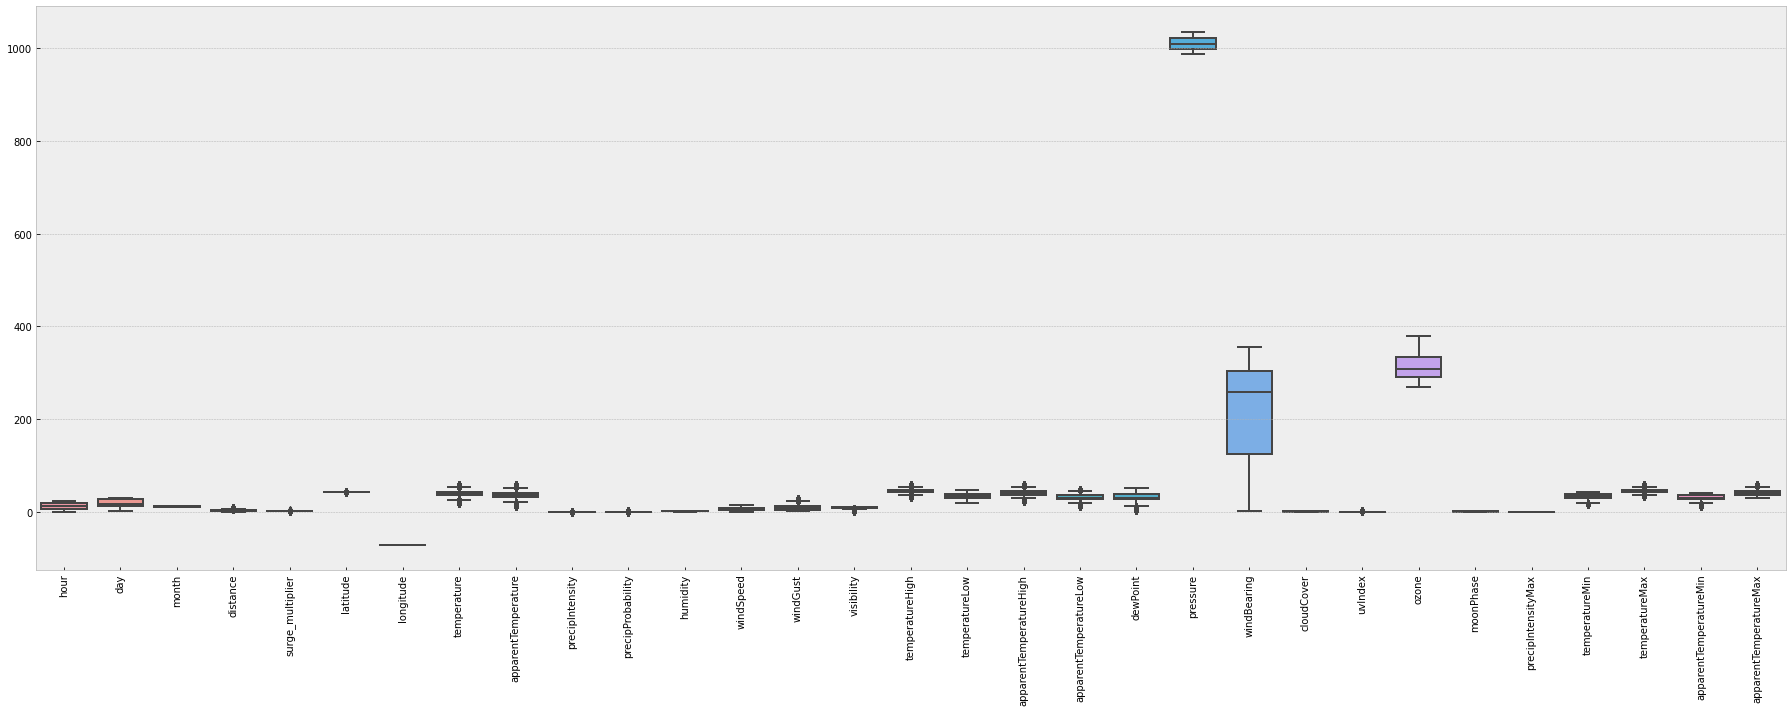

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df[numeric_features])
plt.xticks(rotation=90);

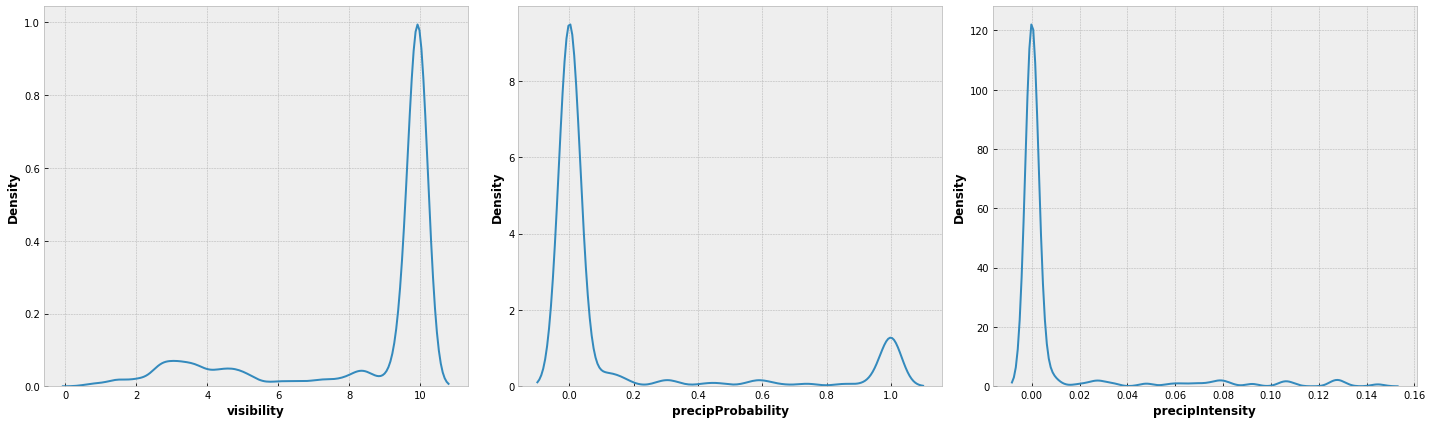

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(20,6))
sns.kdeplot(df["visibility"],ax=axs[0])
sns.kdeplot(df["precipProbability"],ax=axs[1])
sns.kdeplot(df["precipIntensity"],ax=axs[2]);

# Feature Engineering


In [ ]:
#create new column to store day name 
df["day_name"]=df["datetime"].dt.day_name()

#create new column to store period of day 
def period (x):
    if x in [12,13,14,15,16,17,18]:
       return "Afternoon"
    elif x in [19,20,21,22,23,0]:
       return "Evening"
    else:
        return "Morning"
    
df['period']=df["hour"].apply(period)

#print first rows as sample
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day_name,period
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,Sunday,Morning
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,Tuesday,Morning
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,Wednesday,Morning
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,Friday,Morning
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,Thursday,Morning


In [ ]:
df.shape

(92084, 44)

In [ ]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'day_name',
       'period'],
      dtype='object')

In [ ]:
x_=df

# Exploratory Data Analysis

In [ ]:
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day_name,period
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,Sunday,Morning
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,Tuesday,Morning
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,Wednesday,Morning
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,Friday,Morning
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,Thursday,Morning


In [ ]:
df.to_csv("visualize_data.csv")

**Univarite Analysis**

In [ ]:
# The most 5 hours in which trips occured
df.groupby("hour")[["id"]].count().sort_values(by="id",ascending=False).head().rename(columns={"id":"Number of Trips"})

,Number of Trips
hour,
0,4390
23,4237
10,4007
15,4002
2,3998


In [ ]:
# The least 5 hours in which trips occured
df.groupby("hour")[["id"]].count().sort_values(by="id",ascending=True).head().rename(columns={"id":"Number of Trips"})

,Number of Trips
hour,
8,3231
7,3316
5,3356
3,3615
20,3631


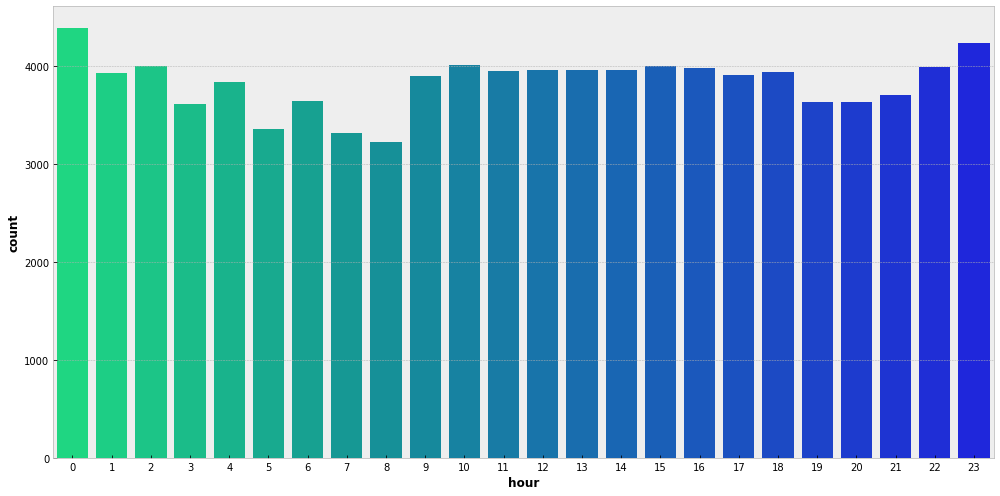

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x="hour",data=df,palette="winter_r")
plt.show()

In [ ]:
df.groupby(["hour","cab_type"])[["id"]].count().rename(columns={"id":"count"})

count
hour cab_type       
0    Lyft       2164
     Uber       2226
1    Lyft       1873
     Uber       2061
2    Lyft       1950
     Uber       2048
3    Lyft       1761
     Uber       1854
4    Lyft       1855
     Uber       1988
5    Lyft       1659
     Uber       1697
6    Lyft       1747
     Uber       1895
7    Lyft       1593
     Uber       1723
8    Lyft       1551
     Uber       1680
9    Lyft       1874
     Uber       2021
10   Lyft       1934
     Uber       2073
11   Lyft       1871
     Uber       2076
12   Lyft       1905
     Uber       2052
13   Lyft       1939
     Uber       2021
14   Lyft       1976
     Uber       1985
15   Lyft       1975
     Uber       2027
16   Lyft       1976
     Uber       2010
17   Lyft       1870
     Uber       2035
18   Lyft       1909
     Uber       2032
19   Lyft       1790
     Uber       1843
20   Lyft       1756
     Uber       1875
21   Lyft       1781
     Uber       1925
22   Lyft       1924
     Uber       2067
23   Lyft       2034
     Uber       2203

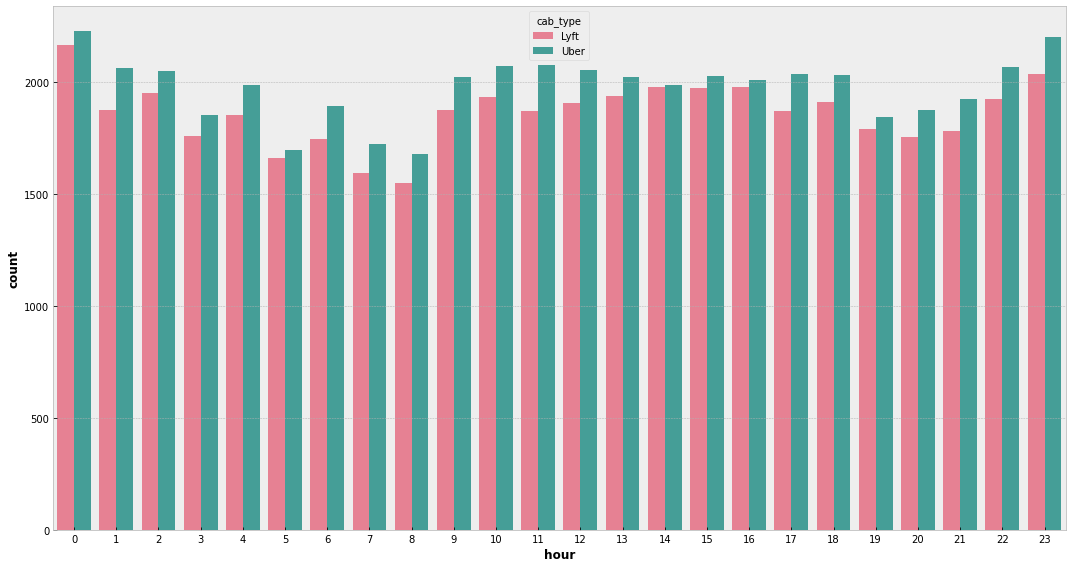

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="hour",data=df,hue="cab_type",palette="husl")
plt.show()

In [ ]:
d=df.groupby("day")["id"].size().sort_values(ascending=False).reset_index(name="count")
d.head()

,day,count
0,28,10270
1,27,10055
2,29,8377
3,1,5962
4,30,5915


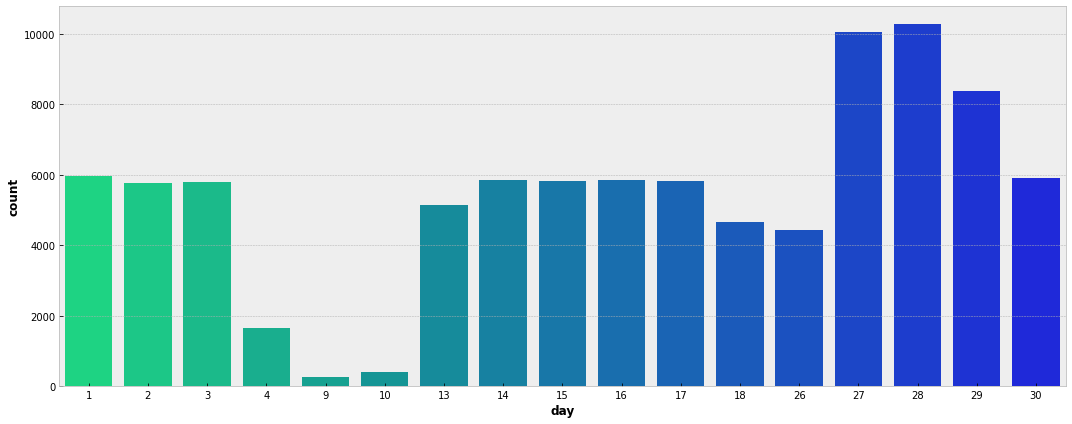

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=d["day"],y=d["count"],data=d,palette="winter_r")
plt.show()

In [ ]:
df.groupby(["day","cab_type"])[["id"]].count().rename(columns={"id":"count"})

count
day cab_type       
1   Lyft       2870
    Uber       3092
2   Lyft       2798
    Uber       2984
3   Lyft       2770
    Uber       3033
4   Lyft        838
    Uber        828
9   Lyft        127
    Uber        127
10  Lyft        231
    Uber        179
13  Lyft       2456
    Uber       2692
14  Lyft       2864
    Uber       2982
15  Lyft       2812
    Uber       3002
16  Lyft       2868
    Uber       2987
17  Lyft       2756
    Uber       3084
18  Lyft       2308
    Uber       2346
26  Lyft       2149
    Uber       2284
27  Lyft       4913
    Uber       5142
28  Lyft       5007
    Uber       5263
29  Lyft       4001
    Uber       4376
30  Lyft       2899
    Uber       3016

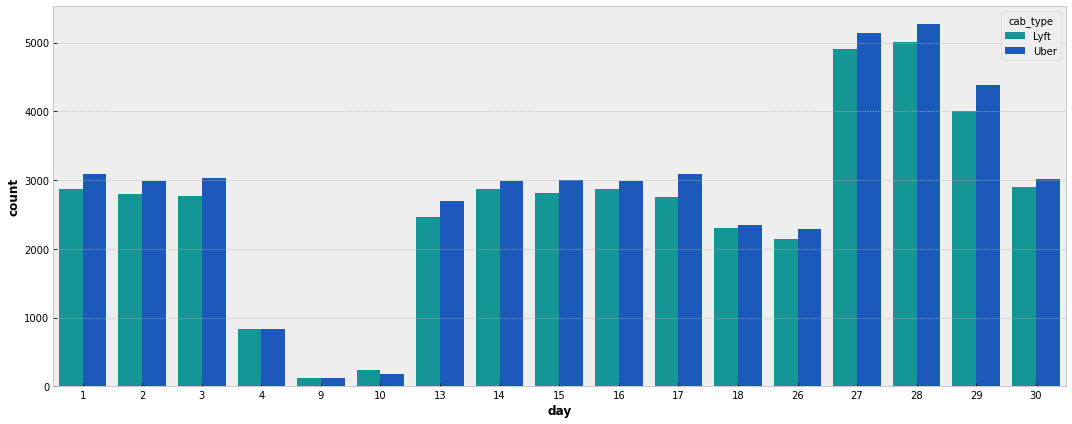

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x="day",data=df,hue="cab_type",palette="winter_r")
plt.show()

In [ ]:
m=df["month"].value_counts().reset_index(name="count").rename(columns={"index":"month"})
m

,month,count
0,12,53034
1,11,39050


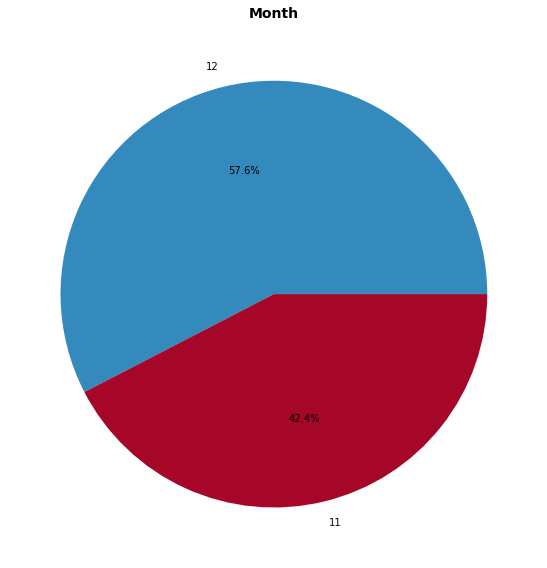

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Month")
plt.pie(m["count"],labels=m["month"],autopct="%1.1f%%")
plt.show() 

In [ ]:
df.groupby(["cab_type","month"])[["id"]].count().rename(columns={"id":"Number of Trips"})

Number of Trips
cab_type month                 
Lyft     11               18969
         12               25698
Uber     11               20081
         12               27336

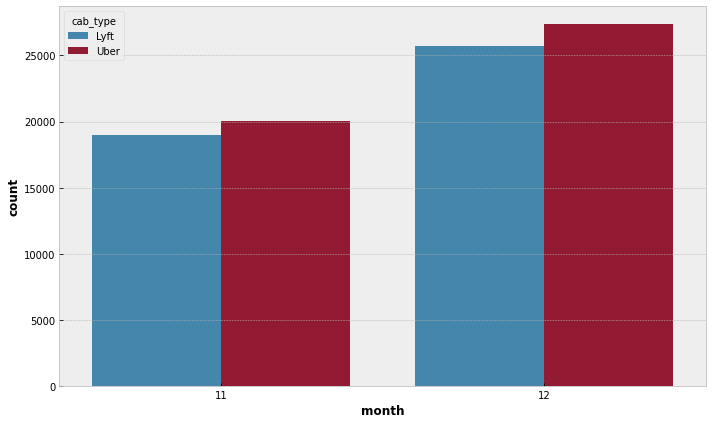

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="month",data=df,hue="cab_type")
plt.show()

In [ ]:
s=df.groupby("source")[["id"]].count().rename(columns={"id":"Number of Trips"}).sort_values(by="Number of Trips",ascending=False)
s

,Number of Trips
source,
Theatre District,8080
West End,7963
Financial District,7727
Back Bay,7725
Beacon Hill,7711
Haymarket Square,7673
Northeastern University,7662
Boston University,7609
South Station,7598


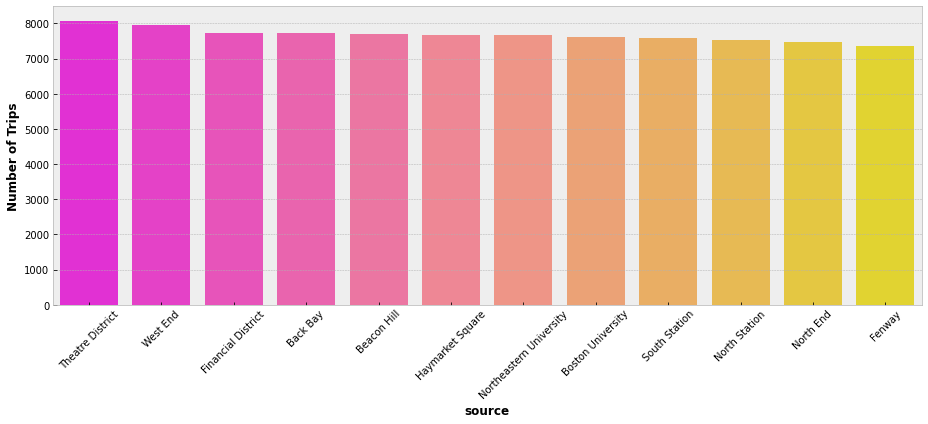

In [ ]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=45)
sns.barplot(y=s["Number of Trips"],x=s.index,palette="spring")
plt.show()

In [ ]:
df["destination"].value_counts().reset_index(name="Number of Trips").rename(columns={"index":"destination"})      

,destination,Number of Trips
0,Boston University,8064
1,Northeastern University,7922
2,Fenway,7844
3,Haymarket Square,7825
4,Financial District,7817
5,North End,7813
6,Theatre District,7754
7,Beacon Hill,7583
8,North Station,7577
9,Back Bay,7513


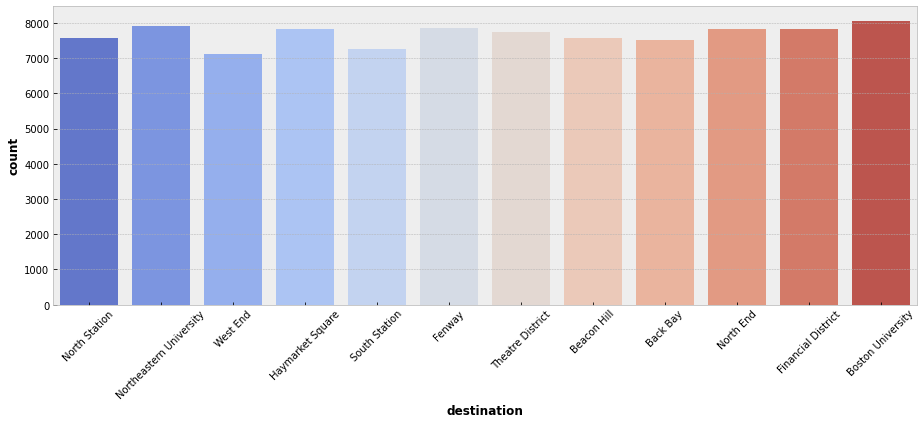

In [ ]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=45)
sns.countplot(x="destination",data=df,palette="coolwarm")
plt.show()

In [ ]:
st=df.groupby(["source","destination"])[["id"]].count().sort_values(by="id",ascending=False).rename(columns={"id":"count"})
st

,,count
source,destination,
West End,Fenway,1489
South Station,Financial District,1431
West End,Northeastern University,1428
Beacon Hill,North End,1417
Theatre District,Boston University,1409
...,...,...
West End,South Station,1136
Northeastern University,West End,1131
Fenway,Beacon Hill,1127


In [ ]:
st=st.stack().reset_index(name="count").drop("level_2",axis=1).head(15)

def trip (x):
   x["trip"]=x["source"] + " --> "+ x["destination"]
   return x

st=st.apply(trip,axis=1)
st

,source,destination,count,trip
0,West End,Fenway,1489,West End --> Fenway
1,South Station,Financial District,1431,South Station --> Financial District
2,West End,Northeastern University,1428,West End --> Northeastern University
3,Beacon Hill,North End,1417,Beacon Hill --> North End
4,Theatre District,Boston University,1409,Theatre District --> Boston University
5,West End,Boston University,1409,West End --> Boston University
6,Northeastern University,Theatre District,1408,Northeastern University --> Theatre District
7,North End,Beacon Hill,1405,North End --> Beacon Hill
8,Haymarket Square,Financial District,1402,Haymarket Square --> Financial District
9,Theatre District,North End,1387,Theatre District --> North End


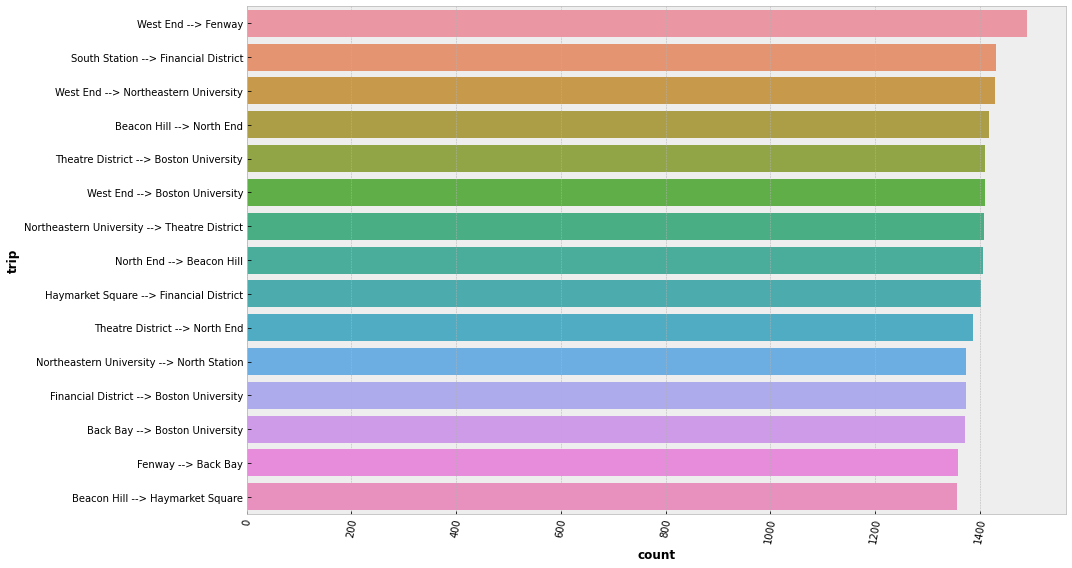

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=80)
sns.barplot(y="trip",x="count",data=st)
plt.show()

West End -> Fenway

In [ ]:
d=df[ (df["source"]=="West End") & (df["destination"]=="Fenway") ]
d

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day_name,period
185,00ffaa21-d3ce-40f6-bf8f-67eb843fca97,6,30,11,2018-11-30 06:28:01,West End,Fenway,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,0,288.3,0.79,0.0004,28.64,42.57,27.20,40.51,Friday,Morning
187,456b9321-925e-4b3e-8696-55d6230afc44,2,2,12,2018-12-02 02:23:03,West End,Fenway,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,0,274.1,0.82,0.0000,30.17,44.11,25.87,43.44,Sunday,Morning
188,80a4247c-0c0f-4962-a8a6-33039e80baf9,17,28,11,2018-11-28 17:16:24,West End,Fenway,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,...,1,352.4,0.72,0.0000,33.70,42.57,29.94,36.55,Wednesday,Afternoon
189,8549feff-78ca-4861-b140-55a9a9b80af6,11,28,11,2018-11-28 11:08:07,West End,Fenway,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,0,345.8,0.72,0.0000,33.85,42.61,30.03,36.57,Wednesday,Morning
190,c44669ec-ed1c-4bbe-9a1a-5ea9d9aa1919,2,1,12,2018-12-01 02:33:00,West End,Fenway,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,0,290.5,0.79,0.0004,28.64,42.57,27.20,40.51,Saturday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99251,91e97c4b-5b5a-4253-b284-9dfe8f362731,14,29,11,2018-11-29 14:23:03,West End,Fenway,Lyft,lyft_line,Shared,...,1,331.8,0.75,0.0000,35.20,44.96,31.40,38.85,Thursday,Afternoon
99252,b1fa0ca9-eebc-4899-bc41-419fe97f3df6,17,14,12,2018-12-14 17:35:04,West End,Fenway,Lyft,lyft,Lyft,...,1,289.1,0.24,0.0000,26.93,46.68,27.58,43.98,Friday,Afternoon
99253,b901d198-4132-4e3f-9fab-23e100516844,18,13,12,2018-12-13 18:15:11,West End,Fenway,Lyft,lyft_lux,Lux Black,...,1,330.9,0.21,0.0001,17.85,33.78,13.73,33.11,Thursday,Afternoon
99254,cfaad603-0df3-4dcf-92fc-759c89a84eb7,13,28,11,2018-11-28 13:26:24,West End,Fenway,Lyft,lyft_plus,Lyft XL,...,0,348.0,0.72,0.0001,33.10,42.18,29.11,35.75,Wednesday,Afternoon


In [ ]:
len(d)

1489

In [ ]:
d.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'day_name',
       'period'],
      dtype='object')

In [ ]:
d.surge_multiplier.min()

1.0

In [ ]:
d.surge_multiplier.mean()

1.0055406312961719

In [ ]:
d.surge_multiplier.max()

1.5

In [ ]:
d.groupby("cab_type").agg({"cab_type":len,"price":min}).rename(columns={"price":"min_price"})

,cab_type,min_price
cab_type,,
Lyft,800,3.0
Uber,689,7.5


In [ ]:
d.groupby("cab_type").agg({"cab_type":len,"price":max}).rename(columns={"price":"max_price"})

,cab_type,max_price
cab_type,,
Lyft,800,52.5
Uber,689,35.0


In [ ]:
d["period"].value_counts().reset_index(name="count").rename(columns={"index":"period"})

,period,count
0,Morning,675
1,Afternoon,432
2,Evening,382


In [ ]:
d.groupby("month")[["id"]].count().rename(columns={"id":"count"})

,count
month,
11,617
12,872


In [ ]:
d.groupby("day_name")[["id"]].count().rename(columns={"id":"count"})

,count
day_name,
Friday,169
Monday,278
Saturday,197
Sunday,208
Thursday,206
Tuesday,263
Wednesday,168


In [ ]:
d.groupby(["cab_type","name"])[["id"]].count().rename(columns={"id":"count"})

count
cab_type name               
Lyft     Lux             131
         Lux Black       133
         Lux Black XL    134
         Lyft            134
         Lyft XL         133
         Shared          135
Uber     Black           116
         Black SUV       113
         UberPool        114
         UberX           116
         UberXL          116
         WAV             114

In [ ]:
d.distance.min()

2.84

In [ ]:
d.distance.max()

3.13

In [ ]:
d.distance.mean()

2.905883143049026

In [ ]:
c=df.groupby("cab_type")["id"].size().reset_index(name="count")
c

,cab_type,count
0,Lyft,44667
1,Uber,47417


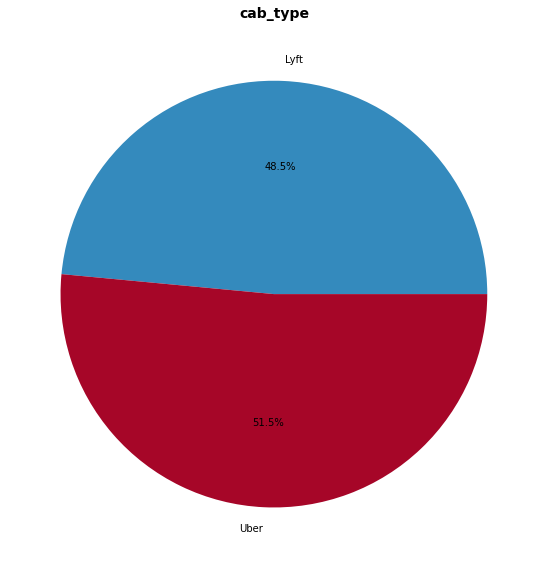

In [ ]:
plt.figure(figsize=(8,8))
plt.title("cab_type")
plt.pie(c["count"],labels=c["cab_type"],autopct="%1.1f%%")
plt.show() 

In [ ]:
df.groupby("cab_type")[["price"]].mean()

,price
cab_type,
Lyft,17.421273
Uber,15.781903


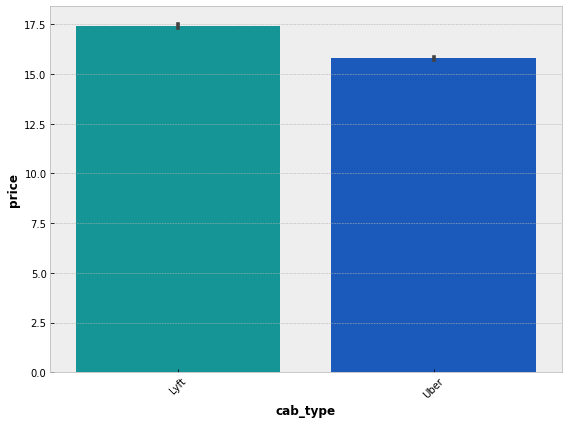

In [ ]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(x="cab_type",y="price",estimator=np.mean,data=df,palette="winter_r")
plt.show()

In [ ]:
n=df.groupby(["name","cab_type"])[["id"]].count().rename(columns={"id":"count"}).stack().reset_index(name="count").drop("level_2",axis=1).sort_values(by="count")
n

,name,cab_type,count
6,Lyft XL,Lyft,7430
5,Lyft,Lyft,7435
2,Lux,Lyft,7436
3,Lux Black,Lyft,7439
7,Shared,Lyft,7460
4,Lux Black XL,Lyft,7467
1,Black SUV,Uber,7893
9,UberX,Uber,7894
0,Black,Uber,7896
11,WAV,Uber,7902


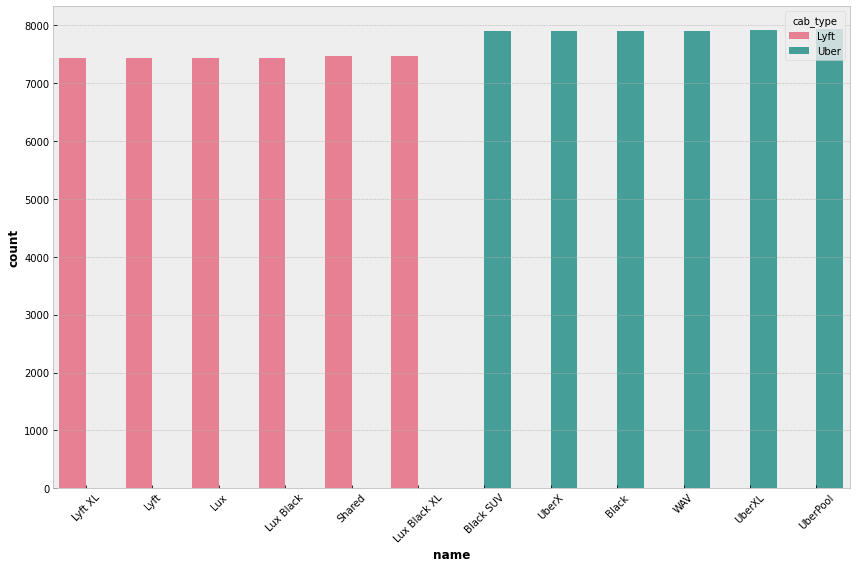

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(x="name",y="count",data=n,hue="cab_type",palette="husl")
plt.show()

In [ ]:
df.groupby(["cab_type","name"])["price"].mean().reset_index(name="mean of price")#.sort_values(by="mean of price",ascending=False)

,cab_type,name,mean of price
0,Lyft,Lux,17.867738
1,Lyft,Lux Black,23.156540
2,Lyft,Lux Black XL,32.419178
3,Lyft,Lyft,9.643712
4,Lyft,Lyft XL,15.377793
5,Lyft,Shared,6.031903
6,Uber,Black,20.529699
7,Uber,Black SUV,30.261688
8,Uber,UberPool,8.755773
9,Uber,UberX,9.765645


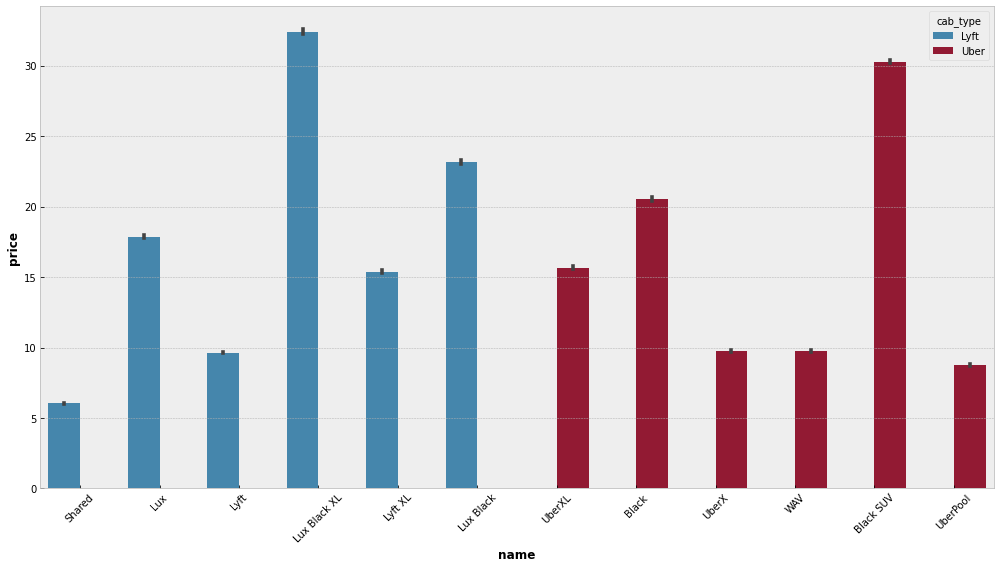

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(x="name",y="price",hue="cab_type",data=df) 
plt.show()

In [ ]:
df.groupby("cab_type")[["distance"]].mean()

,distance
cab_type,
Lyft,2.195701
Uber,2.193884


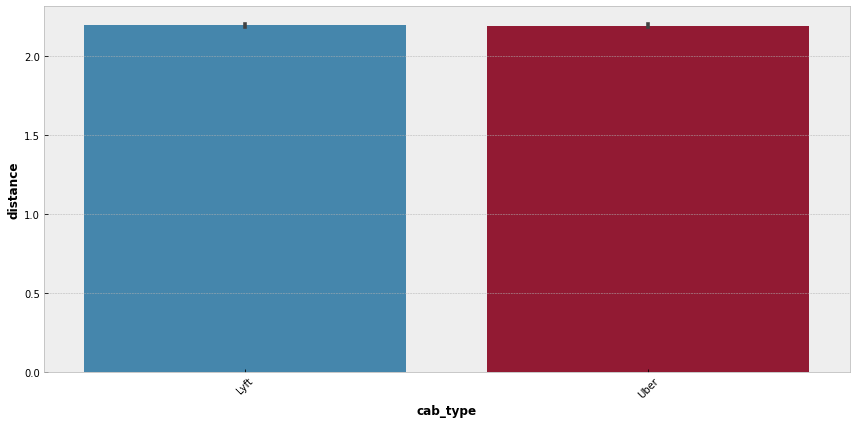

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.barplot(x='cab_type',y="distance",data=df)
plt.show()

In [ ]:
df.groupby(["cab_type","name"])[["distance"]].mean().sort_values(by="distance",ascending=False)

distance
cab_type name                  
Lyft     Lux           2.199934
         Lyft XL       2.198693
Uber     UberX         2.197402
         Black SUV     2.195554
Lyft     Lux Black     2.194864
Uber     UberPool      2.194596
         UberXL        2.194469
Lyft     Lyft          2.194340
         Shared        2.193216
         Lux Black XL  2.193178
Uber     WAV           2.192609
         Black         2.188674

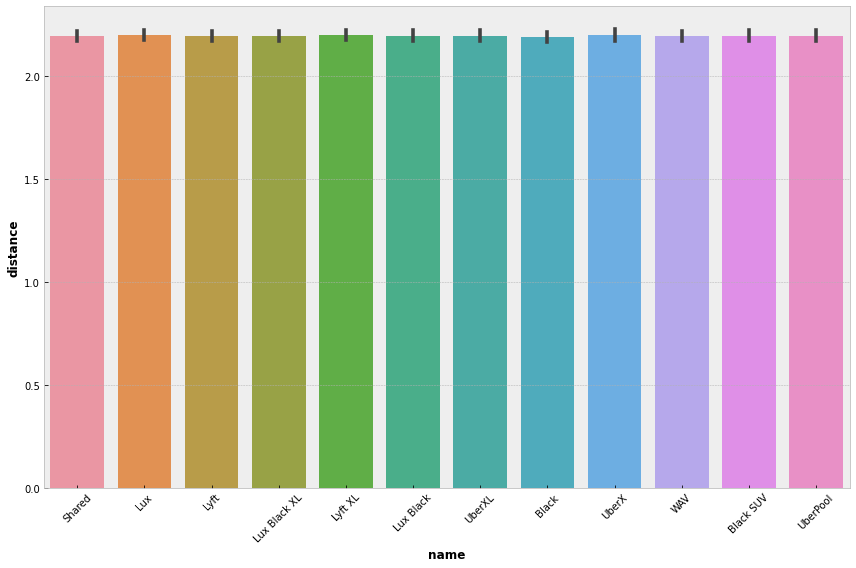

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(x='name',y="distance",data=df)
plt.show()

In [ ]:
print("max price is",df["price"].max())
d=df[ df["price"]==df["price"].max() ]
print("number of trips",len(d))
d.iloc[:,40:]

max price is 92.0
number of trips 2


,apparentTemperatureMin,apparentTemperatureMax,day_name,period
28083,29.88,36.56,Wednesday,Evening
75919,13.47,32.82,Thursday,Afternoon


In [ ]:
d.surge_multiplier.value_counts()

2.0    2
Name: surge_multiplier, dtype: int64

In [ ]:
print("min price is",df["price"].min())
f=df[ df["price"]==df["price"].min() ]
print("number of trips",len(f))
f.iloc[:,:10]

min price is 2.5
number of trips 31


,id,hour,day,month,datetime,source,destination,cab_type,product_id,name
5901,f6ed86e6-c3f1-42f5-9ce9-bb4bea19f18e,23,28,11,2018-11-28 23:33:41,Boston University,Back Bay,Lyft,lyft_line,Shared
7370,5c77b1f4-dbd3-4533-8ba9-ddc4af2ad740,11,18,12,2018-12-18 11:45:10,Haymarket Square,Beacon Hill,Lyft,lyft_line,Shared
8623,9da5d7c6-cbf6-4dc9-a69f-3c57893ade01,21,28,11,2018-11-28 21:20:10,South Station,Financial District,Lyft,lyft_line,Shared
16675,1ad71e9a-d990-49be-8b77-6e94fb40f260,6,27,11,2018-11-27 06:06:21,Fenway,Back Bay,Lyft,lyft_line,Shared
17032,93192aa7-f773-4127-9a02-ab52d061d26a,2,29,11,2018-11-29 02:29:08,North End,North Station,Lyft,lyft_line,Shared
20774,fb98185d-1f47-430b-a734-2b79b20161ea,14,17,12,2018-12-17 14:50:10,Haymarket Square,Back Bay,Lyft,lyft_line,Shared
21042,7801b002-5f2b-4586-97d5-eada6f5c154c,11,26,11,2018-11-26 11:17:09,Financial District,South Station,Lyft,lyft_line,Shared
34810,0a740c9e-1ddd-4df0-b68c-796f69fbfe42,4,18,12,2018-12-18 04:50:10,West End,North End,Lyft,lyft_line,Shared
35036,a05258e1-ec25-48fc-9e67-d1c664c7505b,18,27,11,2018-11-27 18:45:22,Fenway,Back Bay,Lyft,lyft_line,Shared
36008,749360d2-1ac2-4b0a-9736-f5a947d24c40,3,18,12,2018-12-18 03:10:08,Fenway,Back Bay,Lyft,lyft_line,Shared


all trips are owned by a Lyft
all trips model Shared

In [ ]:
f.surge_multiplier.value_counts()

1.0    31
Name: surge_multiplier, dtype: int64

In [ ]:
f.groupby("source")[["id"]].count()

,id
source,
Back Bay,2
Beacon Hill,2
Boston University,2
Fenway,3
Financial District,5
Haymarket Square,8
North End,4
North Station,1
South Station,2


In [ ]:
f.groupby("destination")[["id"]].count()

,id
destination,
Back Bay,6
Beacon Hill,3
Boston University,2
Financial District,5
Haymarket Square,3
North End,4
North Station,3
Northeastern University,1
South Station,2


In [ ]:
y=df.groupby("hour")[["price"]].mean().sort_values(by="price",ascending=False)
y.head()

,price
hour,
14,16.830472
5,16.753129
21,16.720993
1,16.695094
16,16.693176


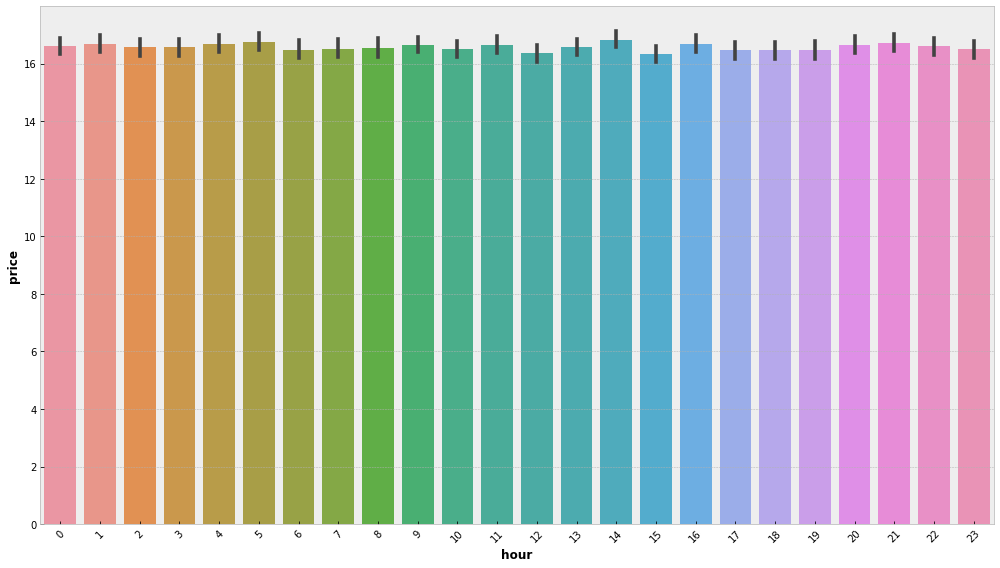

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(x="hour",y="price",data=df)
plt.show()

In [ ]:
y=df.groupby("day")[["price"]].mean().sort_values(by="price",ascending=False)
y.head()

,price
day,
4,16.860144
27,16.713774
18,16.711968
2,16.698288
9,16.694882


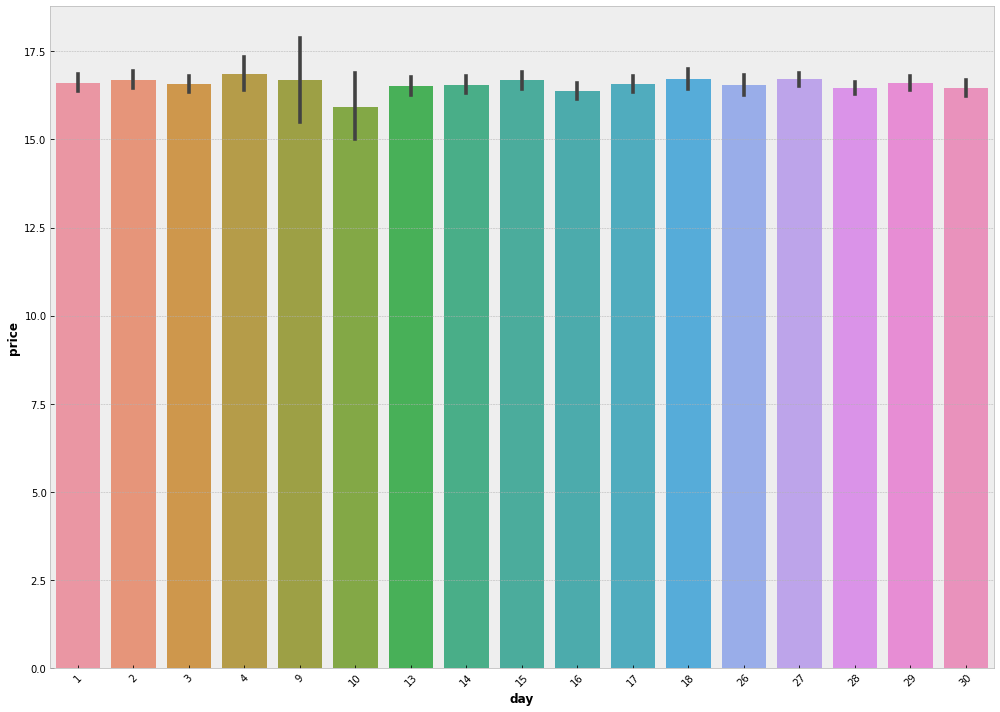

In [ ]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45)
sns.barplot(x="day",y="price",data=df)
plt.show()

In [ ]:
df.groupby("month")[["price"]].mean().sort_values(by="price",ascending=False)

,price
month,
12,16.586982
11,16.563700


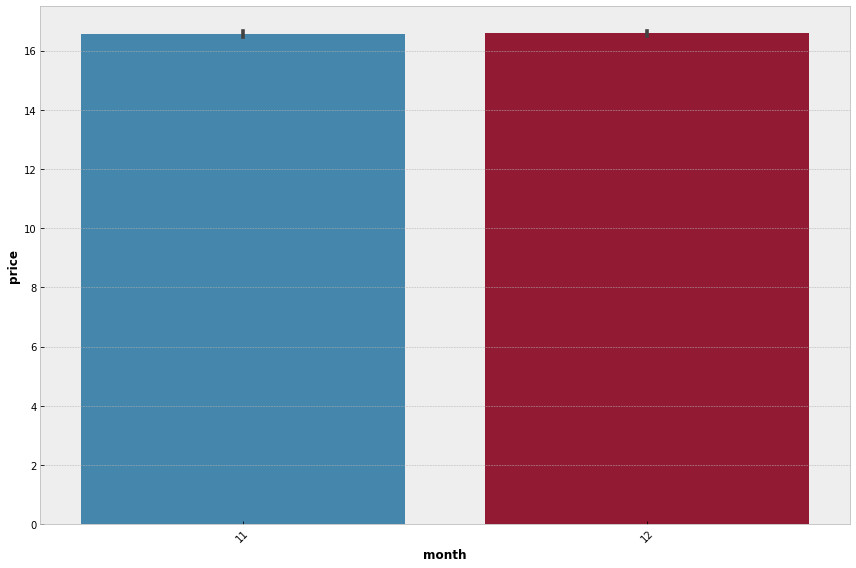

In [ ]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.barplot(x="month",y="price",data=df)
plt.show()

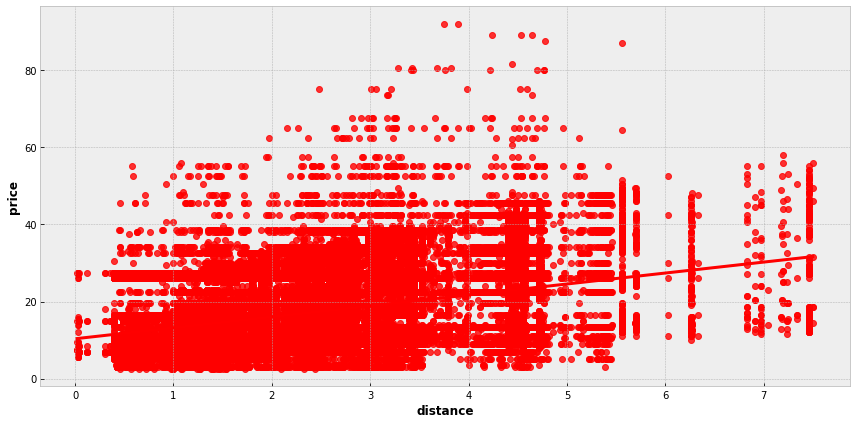

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x="distance",y="price",data=df,color="r")
plt.show()

In [ ]:
s=df["icon"].value_counts().reset_index(name="count").rename(columns={"index":"icon"})
s

,icon,count
0,cloudy,29125
1,partly-cloudy-night,21309
2,partly-cloudy-day,15124
3,rain,13753
4,clear-night,8127
5,clear-day,3455
6,fog,1191


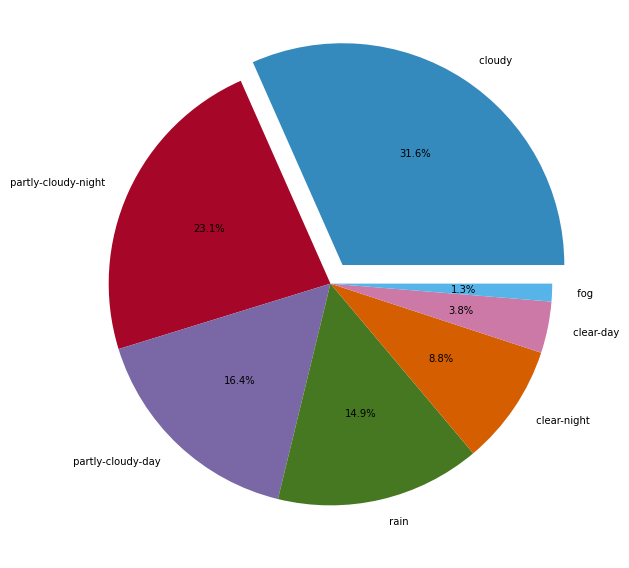

In [ ]:
plt.figure(figsize=(12,8))
plt.pie(s["count"],labels=s["icon"],autopct="%0.1f%%",explode=[0.1,0,0,0,0,0,0])
plt.show()

In [ ]:
s=df.groupby("icon")[["price"]].mean().sort_values(by="price",ascending=False)
s

,price
icon,
fog,16.717045
rain,16.626663
clear-day,16.616498
partly-cloudy-night,16.613661
cloudy,16.557854
partly-cloudy-day,16.555508
clear-night,16.469361


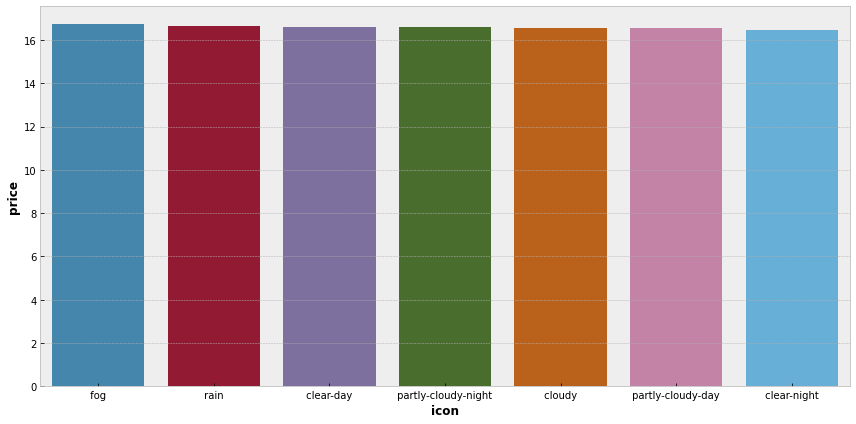

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=s.index,y="price",data=s)
plt.show()

In [ ]:
s=df.groupby("icon")[["distance"]].mean().sort_values(by="distance",ascending=False)
s

,distance
icon,
fog,2.222024
clear-day,2.220064
partly-cloudy-day,2.202621
rain,2.195758
partly-cloudy-night,2.195584
cloudy,2.193259
clear-night,2.166967


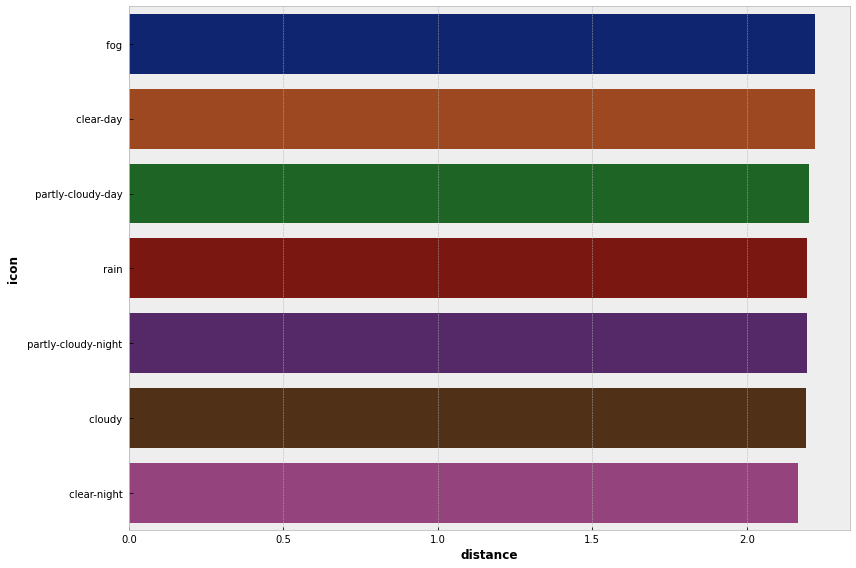

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x="distance",y=s.index,data=s,palette="dark")
plt.show()

In [ ]:
df.groupby(["cab_type","icon"])[["id"]].count().rename(columns={"id":"count"})

count
cab_type icon                        
Lyft      clear-day              1698
          clear-night            3977
          cloudy                14140
          fog                     589
          partly-cloudy-day      7348
          partly-cloudy-night   10285
          rain                   6630
Uber      clear-day              1757
          clear-night            4150
          cloudy                14985
          fog                     602
          partly-cloudy-day      7776
          partly-cloudy-night   11024
          rain                   7123

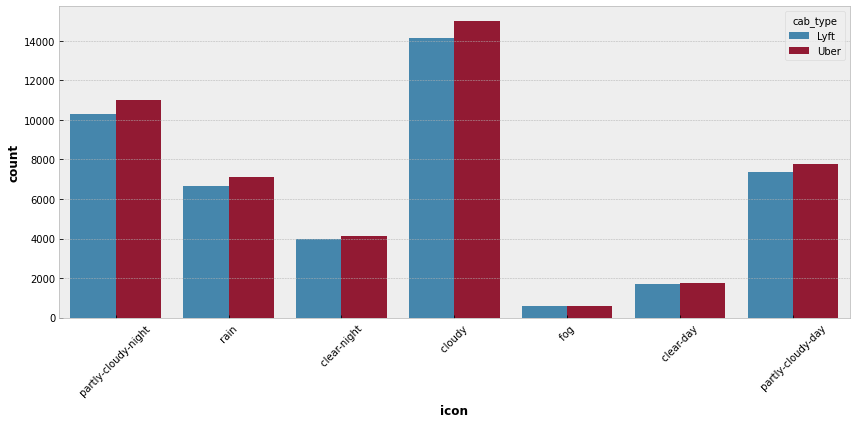

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(x="icon",data=df,hue="cab_type")
plt.show()

In [ ]:
v=df["day_name"].value_counts().reset_index(name="count").rename(columns={"index":"day_name"})
v

,day_name,count
0,Monday,16486
1,Tuesday,16375
2,Thursday,13525
3,Sunday,11891
4,Saturday,11776
5,Friday,11761
6,Wednesday,10270


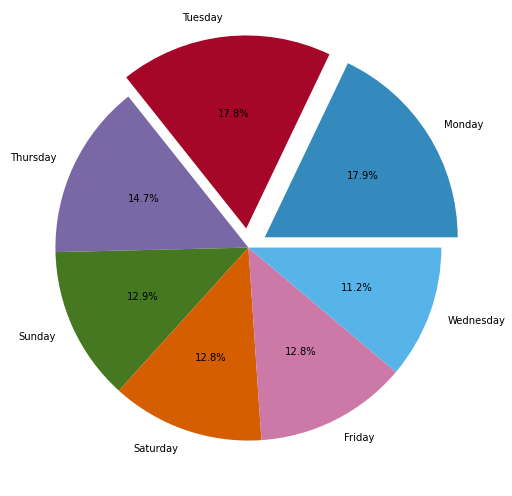

In [ ]:
plt.figure(figsize=(14,7))
plt.pie(v["count"],labels=v.day_name,autopct="%0.1f%%",explode=[0.1,0.1,0,0,0,0,0])
plt.show()

In [ ]:
df.groupby("day_name")[["price"]].mean().sort_values(by="price",ascending=False)

,price
day_name,
Tuesday,16.728153
Saturday,16.638927
Thursday,16.572274
Monday,16.546919
Sunday,16.537802
Friday,16.503656
Wednesday,16.449854


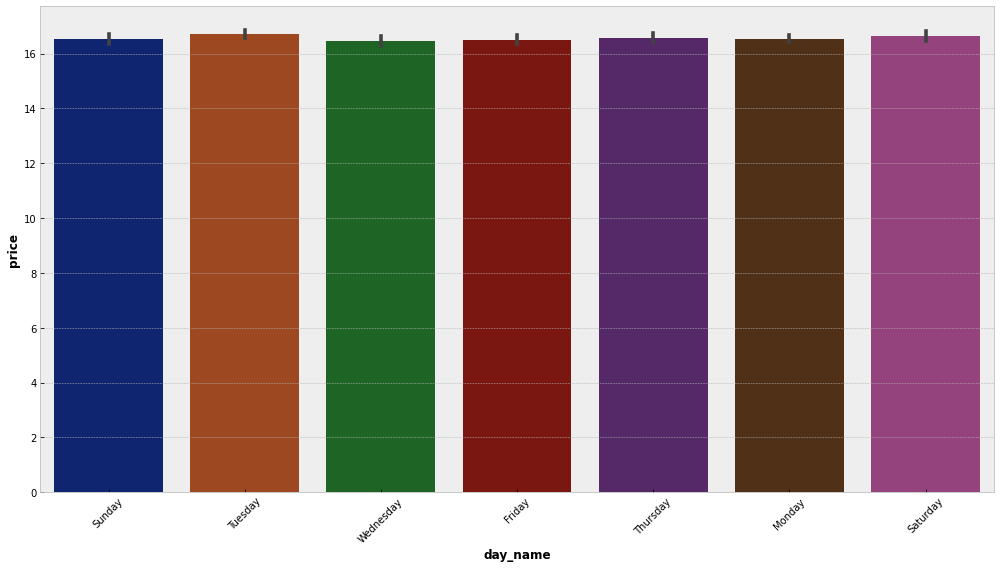

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(x="day_name",y="price",data=df,palette="dark")
plt.show()

In [ ]:
df.groupby(["cab_type","day_name"])[["price"]].mean().sort_values(by="price",ascending=False)

price
cab_type day_name            
Lyft     Saturday   17.655755
         Thursday   17.451293
         Sunday     17.429656
         Tuesday    17.422571
         Friday     17.400052
         Monday     17.375664
         Wednesday  17.201118
Uber     Tuesday    16.055195
         Monday     15.783275
         Thursday   15.769242
         Wednesday  15.735132
         Saturday   15.690843
         Sunday     15.690554
         Friday     15.642381

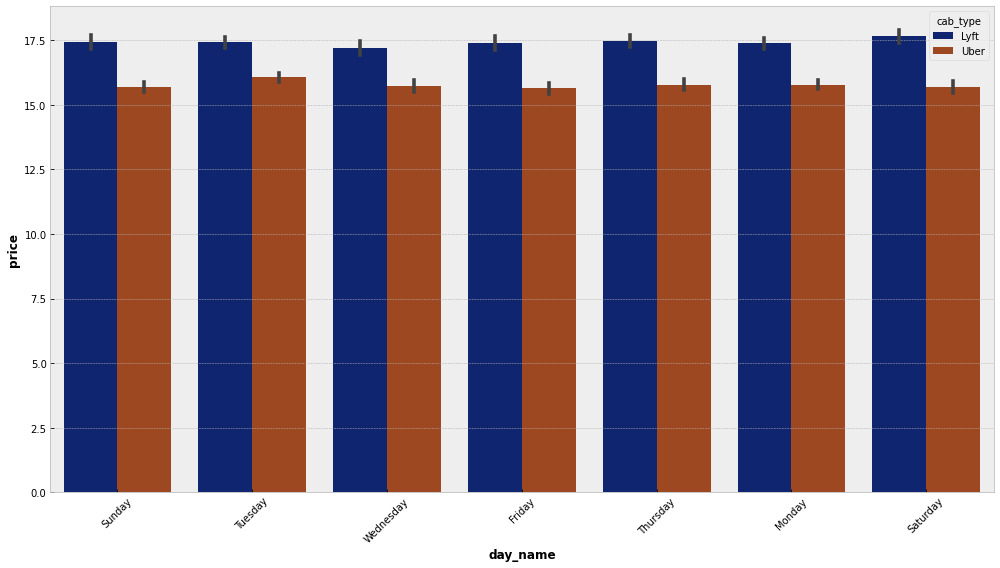

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(x="day_name",y="price",hue="cab_type",data=df,palette="dark")
plt.show()

In [ ]:
df.groupby(["cab_type","day_name"])[["distance"]].mean().sort_values(by="distance",ascending=False)

distance
cab_type day_name           
Uber     Tuesday    2.216248
Lyft     Saturday   2.212686
Uber     Wednesday  2.205926
         Friday     2.202369
Lyft     Tuesday    2.202073
         Sunday     2.197084
         Thursday   2.193251
Uber     Monday     2.193150
Lyft     Wednesday  2.191025
         Friday     2.190585
         Monday     2.184675
Uber     Thursday   2.184198
         Sunday     2.183957
         Saturday   2.166817

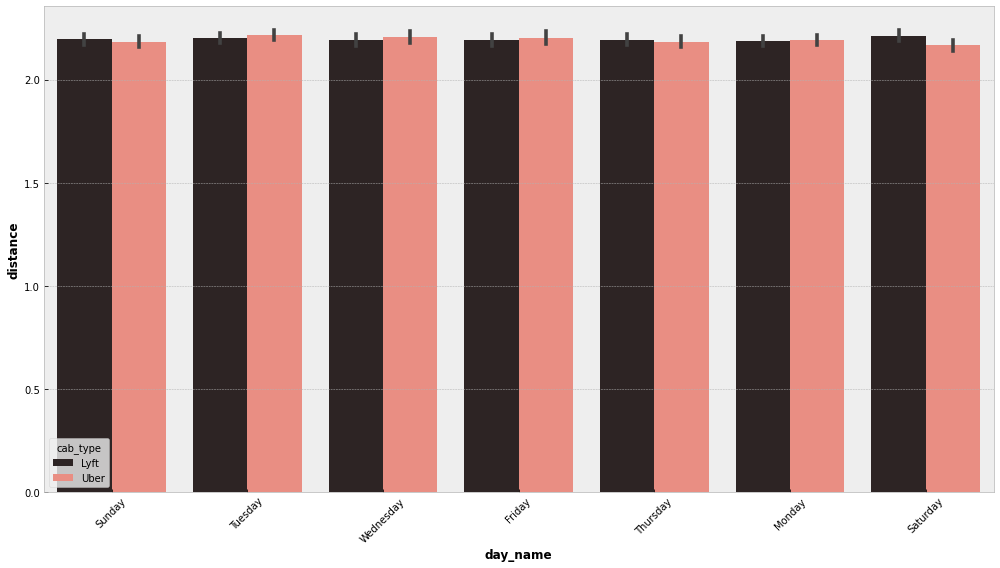

In [ ]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=45)
sns.barplot(x="day_name",y="distance",data=df,hue="cab_type",palette="dark:salmon")
plt.show()

In [ ]:
v=df["period"].value_counts().reset_index(name="count").rename(columns={"index":"period"})
v

,period,count
0,Morning,40784
1,Afternoon,27712
2,Evening,23588


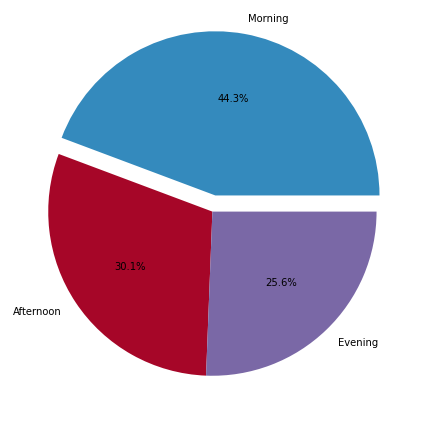

In [ ]:
plt.figure(figsize=(16,6))
plt.pie(v["count"],labels=v.period,autopct="%0.1f%%",explode=[0.1,0,0])
plt.show()

In [ ]:
df.groupby("period")[["price"]].mean()

,price
period,
Afternoon,16.527948
Evening,16.587968
Morning,16.604232


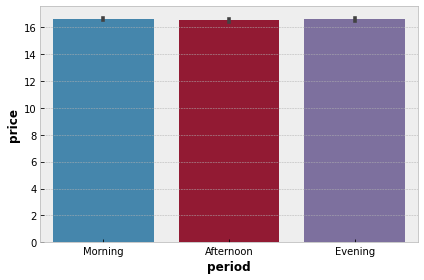

In [ ]:
sns.barplot(x="period",y="price",data=df);

In [ ]:
df.groupby("period")[["distance"]].mean()

,distance
period,
Afternoon,2.194389
Evening,2.209408
Morning,2.186552


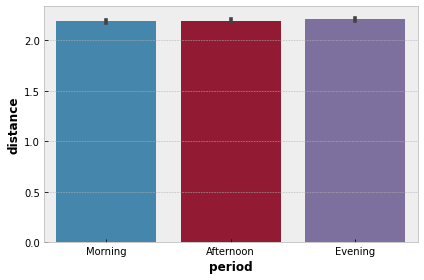

In [ ]:
sns.barplot(x="period",y="distance",data=df);

In [ ]:
df.groupby("surge_multiplier")[["distance"]].mean()

,distance
surge_multiplier,
1.00,2.189869
1.25,2.259320
1.50,2.421210
1.75,2.198032
2.00,2.533070
2.50,2.869231
3.00,4.640000


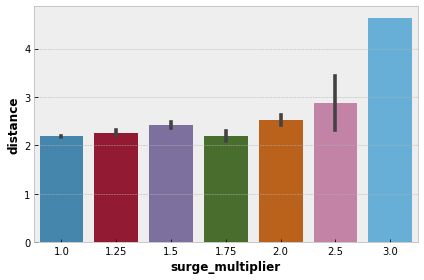

In [ ]:
sns.barplot(x=df.surge_multiplier,y=df.distance);

In [ ]:
df.groupby("surge_multiplier")[["price"]].mean()

,price
surge_multiplier,
1.00,16.167438
1.25,23.690734
1.50,28.593420
1.75,32.243935
2.00,39.870423
2.50,31.461538
3.00,50.250000


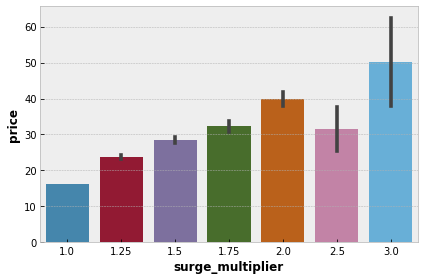

In [ ]:
sns.barplot(x=df.surge_multiplier,y=df.price);

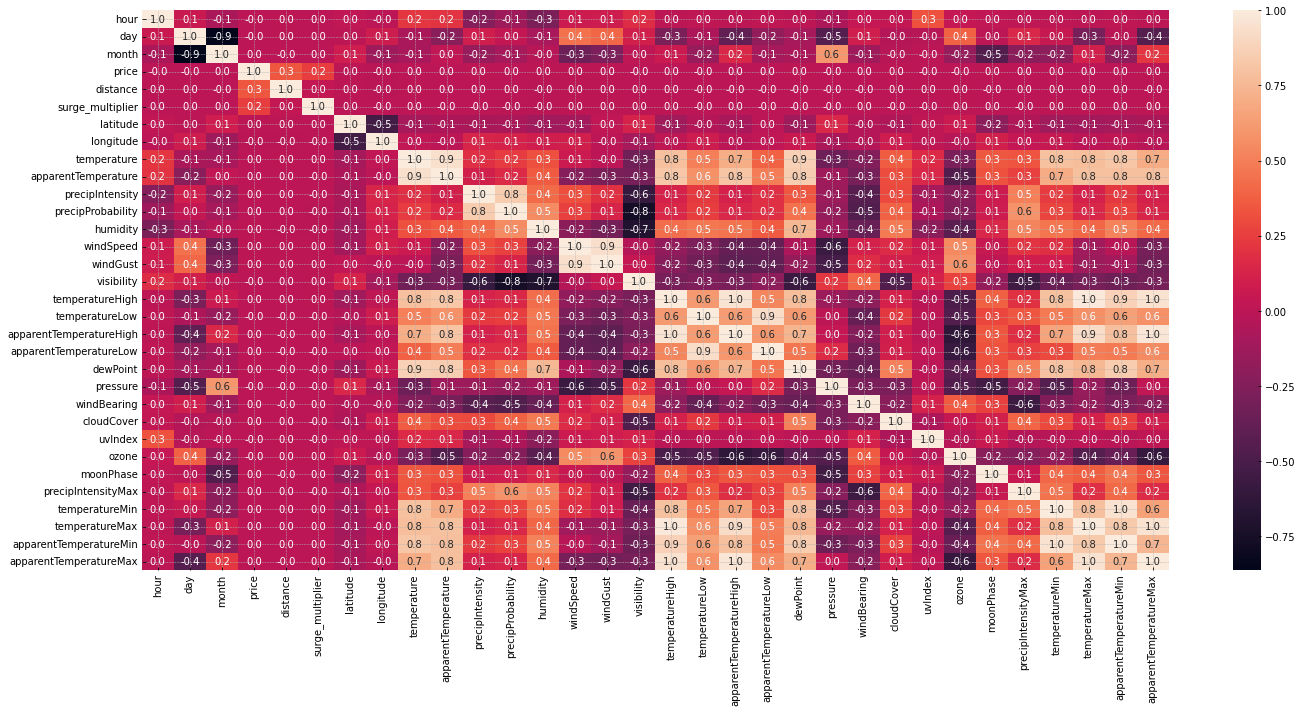

In [ ]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(),annot=True,fmt=".1f");

#Data Preprocessing

In [ ]:
df.head()

,id,hour,day,month,datetime,source,destination,cab_type,product_id,name,...,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day_name,period
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,Sunday,Morning
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,Tuesday,Morning
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,Lyft,...,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,Wednesday,Morning
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,Friday,Morning
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,Thursday,Morning


In [ ]:
df.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'icon', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax', 'day_name',
       'period'],
      dtype='object')

In [ ]:
drop_columns=["id","datetime","product_id","long_summary","short_summary","latitude","longitude"]

'''
"apparentTemperatureMin","temperatureHigh","temperatureLow","apparentTemperatureHigh","temperatureMax",
"apparentTemperatureLow","temperatureMin","apparentTemperatureMax","precipIntensity", "precipProbability","uvIndex"
'''

'\n"apparentTemperatureMin","temperatureHigh","temperatureLow","apparentTemperatureHigh","temperatureMax",\n"apparentTemperatureLow","temperatureMin","apparentTemperatureMax","precipIntensity", "precipProbability","uvIndex"\n'

In [ ]:
df.drop(columns=drop_columns,inplace=True)      
df

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day_name,period
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,...,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,Sunday,Morning
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,...,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,Tuesday,Morning
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,...,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,Wednesday,Morning
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,Friday,Morning
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,Thursday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19,2,12,Back Bay,Northeastern University,Uber,UberXL,11.5,1.22,1.0,...,0,282.5,0.86,0.0916,36.32,50.80,35.84,50.13,Sunday,Evening
99996,21,26,11,Back Bay,Northeastern University,Uber,UberX,7.5,1.22,1.0,...,0,295.1,0.64,0.1227,40.35,46.59,36.96,43.97,Monday,Evening
99997,4,18,12,Back Bay,Northeastern University,Uber,UberPool,6.0,1.22,1.0,...,0,365.2,0.33,0.0178,34.07,41.42,28.11,35.95,Tuesday,Morning
99998,4,29,11,Back Bay,Northeastern University,Uber,WAV,7.5,1.22,1.0,...,0,346.7,0.72,0.0000,33.70,42.60,29.88,36.56,Thursday,Morning


**Split data into Input and Output**

In [ ]:
x=df.drop("price",axis=1)           #input
y=df["price"]                       #output

In [ ]:
x

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,...,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day_name,period
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.34,...,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,Sunday,Morning
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,43.58,...,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,Tuesday,Morning
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,38.33,...,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,Wednesday,Morning
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,34.38,...,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,Friday,Morning
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,37.44,...,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,Thursday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19,2,12,Back Bay,Northeastern University,Uber,UberXL,1.22,1.0,49.88,...,0,282.5,0.86,0.0916,36.32,50.80,35.84,50.13,Sunday,Evening
99996,21,26,11,Back Bay,Northeastern University,Uber,UberX,1.22,1.0,45.32,...,0,295.1,0.64,0.1227,40.35,46.59,36.96,43.97,Monday,Evening
99997,4,18,12,Back Bay,Northeastern University,Uber,UberPool,1.22,1.0,37.21,...,0,365.2,0.33,0.0178,34.07,41.42,28.11,35.95,Tuesday,Morning
99998,4,29,11,Back Bay,Northeastern University,Uber,WAV,1.22,1.0,38.18,...,0,346.7,0.72,0.0000,33.70,42.60,29.88,36.56,Thursday,Morning


In [ ]:
y

0         5.0
1        11.0
2         7.0
3        26.0
4         9.0
         ... 
99995    11.5
99996     7.5
99997     6.0
99998     7.5
99999    23.0
Name: price, Length: 92084, dtype: float64

**feature encoding**

In [ ]:
x= pd.get_dummies(x,drop_first=True)
x

,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,icon_ partly-cloudy-night,icon_ rain,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,period_Evening,period_Morning
0,9,16,12,0.44,1.0,42.34,37.12,0.0000,0.0,0.68,...,1,0,0,0,1,0,0,0,0,1
1,2,27,11,0.44,1.0,43.58,37.35,0.1299,1.0,0.94,...,0,1,0,0,0,0,1,0,0,1
2,1,28,11,0.44,1.0,38.33,32.93,0.0000,0.0,0.75,...,0,0,0,0,0,0,0,1,0,1
3,4,30,11,0.44,1.0,34.38,29.63,0.0000,0.0,0.73,...,0,0,0,0,0,0,0,0,0,1
4,3,29,11,0.44,1.0,37.44,30.88,0.0000,0.0,0.70,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,19,2,12,1.22,1.0,49.88,49.22,0.0246,1.0,0.93,...,0,1,0,0,1,0,0,0,1,0
99996,21,26,11,1.22,1.0,45.32,41.62,0.0000,0.0,0.84,...,0,0,1,0,0,0,0,0,1,0
99997,4,18,12,1.22,1.0,37.21,31.90,0.0000,0.0,0.69,...,0,0,0,0,0,0,1,0,0,1
99998,4,29,11,1.22,1.0,38.18,32.09,0.0000,0.0,0.70,...,1,0,0,0,0,1,0,0,0,1


**Feature Selection**

Variance Filter

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_filter=VarianceThreshold(threshold=0.1)
var_filter.fit(x)

VarianceThreshold(threshold=0.1)

In [ ]:
var_filter.get_support()

array([ True,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True])

In [ ]:
col=x.columns[var_filter.get_support()]
col

Index(['hour', 'day', 'month', 'distance', 'temperature',
       'apparentTemperature', 'precipProbability', 'windSpeed', 'windGust',
       'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'cab_type_Uber', 'icon_ cloudy ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain ',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'period_Evening',
       'period_Morning'],
      dtype='object')

In [ ]:
len(x.columns[var_filter.get_support()])

36

In [ ]:




f=[x for x in x.columns if x not in col]
f

['surge_multiplier',
 'precipIntensity',
 'humidity',
 'moonPhase',
 'precipIntensityMax',
 'source_Beacon Hill',
 'source_Boston University',
 'source_Fenway',
 'source_Financial District',
 'source_Haymarket Square',
 'source_North End',
 'source_North Station',
 'source_Northeastern University',
 'source_South Station',
 'source_Theatre District',
 'source_West End',
 'destination_Beacon Hill',
 'destination_Boston University',
 'destination_Fenway',
 'destination_Financial District',
 'destination_Haymarket Square',
 'destination_North End',
 'destination_North Station',
 'destination_Northeastern University',
 'destination_South Station',
 'destination_Theatre District',
 'destination_West End',
 'name_Black SUV',
 'name_Lux',
 'name_Lux Black',
 'name_Lux Black XL',
 'name_Lyft',
 'name_Lyft XL',
 'name_Shared',
 'name_UberPool',
 'name_UberX',
 'name_UberXL',
 'name_WAV',
 'icon_ clear-night ',
 'icon_ fog ',
 'day_name_Wednesday']

In [ ]:

x_var=x.drop(columns=f,axis=1)
x_var.shape

(92084, 36)

In [ ]:
x_var.columns  #  28 features  
               #  hour , day , month , distance , temperature , apparentTemperature, \
               #   temperatureHigh, temperatureLow	, precipProbability	, windSpeed	, windGust,\
               #  'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure',\
               # 'windBearing', 'cloudCover', 'uvIndex', 'ozone', 'temperatureMin', 'temperatureMax',\
               # 'apparentTemperatureMin' visibility, apparentTemperatureMax, cab_type, icon, day_name, period 

Index(['hour', 'day', 'month', 'distance', 'temperature',
       'apparentTemperature', 'precipProbability', 'windSpeed', 'windGust',
       'visibility', 'temperatureHigh', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'cab_type_Uber', 'icon_ cloudy ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain ',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'period_Evening',
       'period_Morning'],
      dtype='object')

In [ ]:
x.shape

(92084, 77)

Statistical Test

In [ ]:

y

0         5.0
1        11.0
2         7.0
3        26.0
4         9.0
         ... 
99995    11.5
99996     7.5
99997     6.0
99998     7.5
99999    23.0
Name: price, Length: 92084, dtype: float64

chi2

In [ ]:
y_=y.astype("int")
from sklearn.feature_selection import chi2,f_classif,SelectKBest
chi2_filter=SelectKBest(score_func=chi2,k="all")
x_chi2=chi2_filter.fit_transform(x,y_)

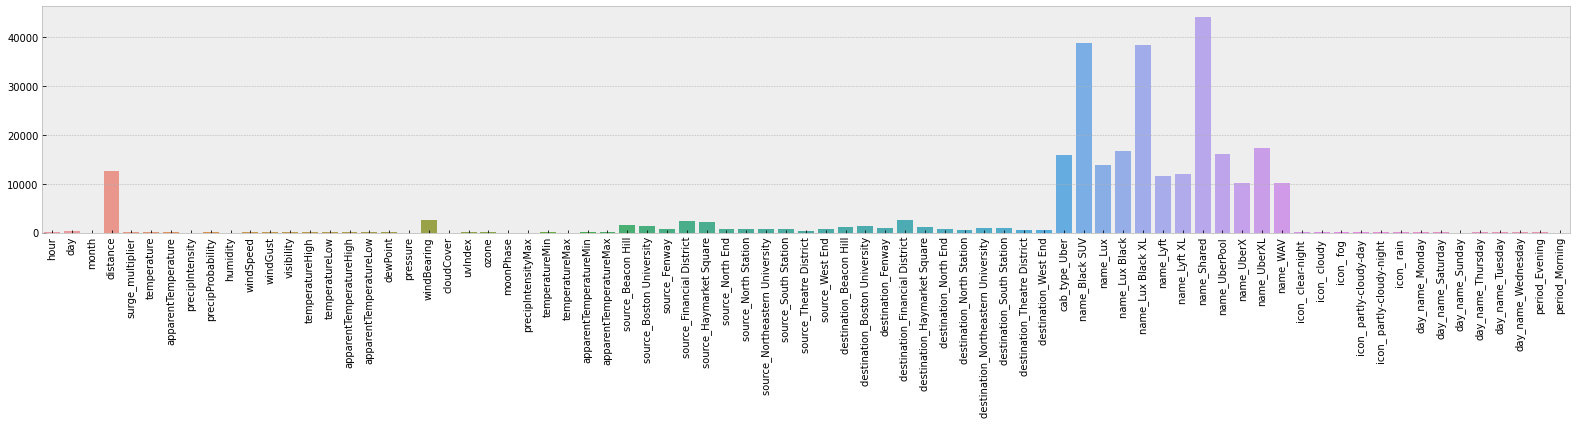

In [ ]:
plt.figure(figsize=[22,6])
sns.barplot(x=[i for i in chi2_filter.feature_names_in_],y=chi2_filter.scores_)
plt.xticks(rotation=90);

In [ ]:
chi2_filter=SelectKBest(score_func=chi2,k=16)
x_chi2=chi2_filter.fit_transform(x,y_)
x_chi2=pd.DataFrame(x_chi2,columns=chi2_filter.get_feature_names_out())
x_chi2          # 6 features [ distance , windbearing , source , destination , cab_type , name ]

,distance,windBearing,source_Financial District,destination_Financial District,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,90.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,310.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92079,1.22,159.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92080,1.22,114.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
92081,1.22,272.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92082,1.22,303.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


f_classif

In [ ]:
f_classif_filter=SelectKBest(score_func=f_classif,k="all")
x_f_classif=f_classif_filter.fit_transform(x,y)

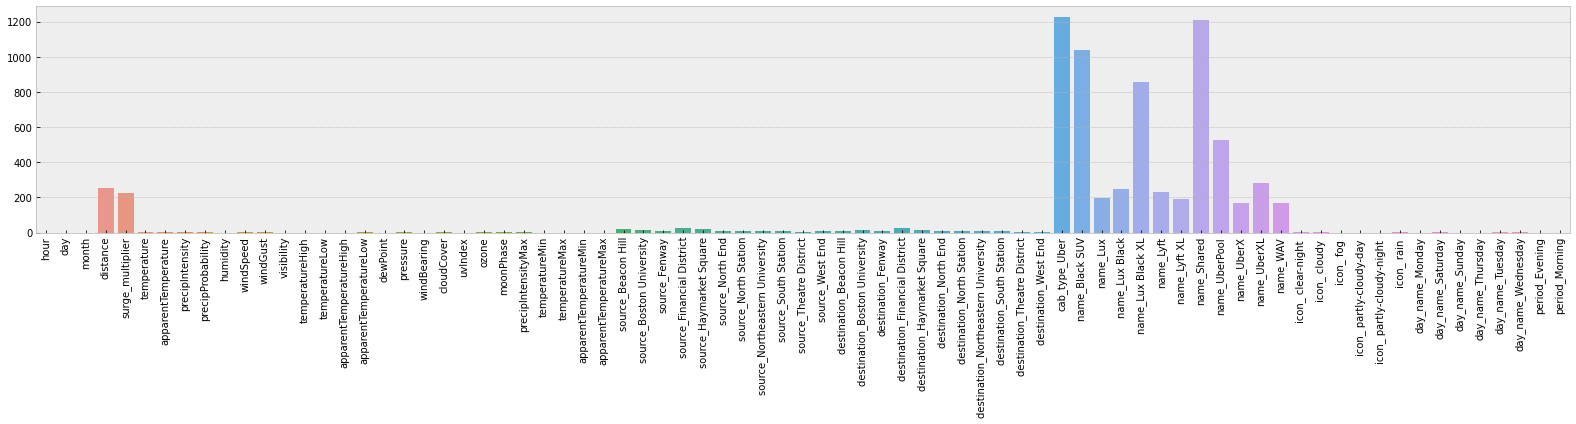

In [ ]:
plt.figure(figsize=[22,6])
sns.barplot(x=[i for i in f_classif_filter.feature_names_in_],y=f_classif_filter.scores_)
plt.xticks(rotation=90);

In [ ]:
f_classif_filter=SelectKBest(score_func=f_classif,k=16)
x_f_classif=f_classif_filter.fit_transform(x,y)
x_f_classif=pd.DataFrame(x_f_classif,columns=f_classif_filter.get_feature_names_out())
x_f_classif       # 6 features [ distance , surge_multiplie , source , destination , cab_type , name ]

,distance,surge_multiplier,source_Financial District,destination_Financial District,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92079,1.22,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
92080,1.22,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
92081,1.22,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
92082,1.22,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Mutual Information (MI)**

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi_filter=SelectKBest(mutual_info_regression,k="all")
x_mi=mi_filter.fit_transform(x,y)

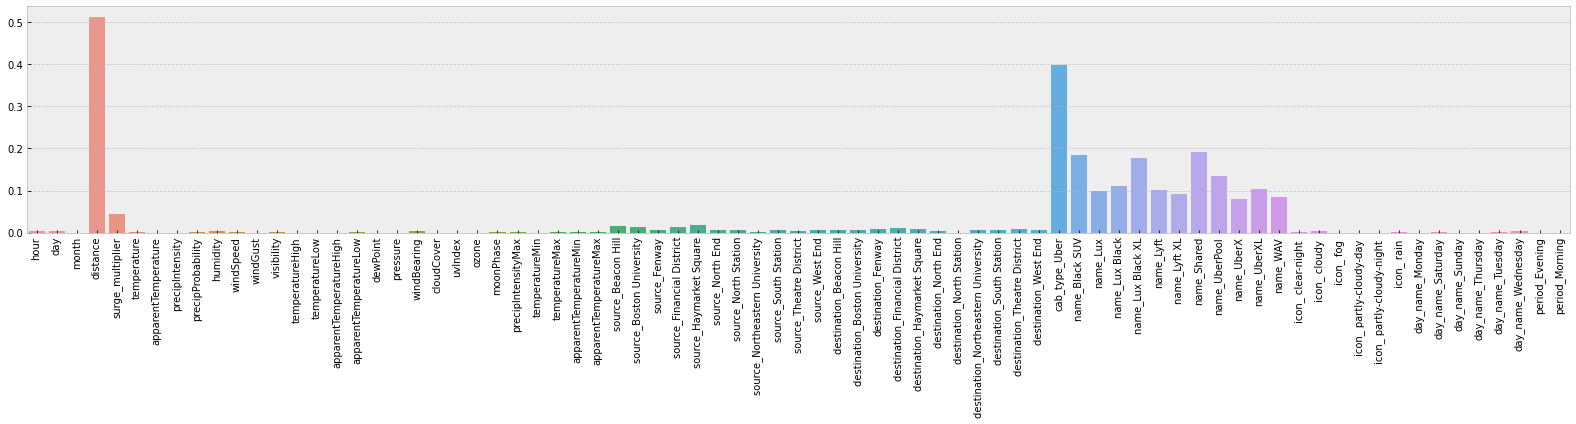

In [ ]:
plt.figure(figsize=[22,6])
sns.barplot(x=[i for i in mi_filter.feature_names_in_],y=mi_filter.scores_)
plt.xticks(rotation=90);

In [ ]:
mi_filter=SelectKBest(mutual_info_regression,k=16)
x_mi=mi_filter.fit_transform(x,y)
x_mi=pd.DataFrame(x_mi,columns=mi_filter.get_feature_names_out())
x_mi.columns       # 5 features [ distance , surge_multiplie , source  , cab_type , name ]

Index(['distance', 'surge_multiplier', 'source_Financial District',
       'source_Haymarket Square', 'cab_type_Uber', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV'],
      dtype='object')

**spilt data into train & test**



In [ ]:
from sklearn.model_selection import train_test_split 
def spliting(x_way):
    x_train, x_test, y_train, y_test = train_test_split(x_way, y, test_size=.20, random_state =0, shuffle= True)
    return x_train, x_test, y_train, y_test

x

x_var          

x_f_classif     (prefered)

In [ ]:
x_train, x_test, y_train, y_test=spliting(x_f_classif)
for i in [x_train, x_test, y_train, y_test]:
    print(i.shape)

(73667, 16)
(18417, 16)
(73667,)
(18417,)


**Feature scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
x_train = stdscaler.fit_transform(x_train)
x_test = stdscaler.transform(x_test)

x_train=pd.DataFrame(x_train,columns=stdscaler.get_feature_names_out())
x_test=pd.DataFrame(x_test,columns=stdscaler.get_feature_names_out())

**PCA**

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)
print("No Of Features before applying PCA: ",pca.n_features_in_,"\nNo Of Features after  applying PCA: ",pca.n_components_)

No Of Features before applying PCA:  16 
No Of Features after  applying PCA:  13


In [ ]:
x_train_pca

array([[ 1.40072239, -0.18880218,  0.31878132, ..., -1.01306092,
         0.16958174, -0.63487314],
       [ 1.40534896,  0.23467968,  0.3083314 , ..., -0.32114494,
        -0.42660853, -0.58312999],
       [-1.50125076,  0.32850865,  0.08885167, ...,  0.05721035,
        -0.15541454,  0.25967478],
       ...,
       [-1.5040501 ,  0.20204024,  0.05828043, ..., -0.1498028 ,
         0.44950529,  0.22334731],
       [ 1.43436701,  4.17017189, -0.75913878, ..., -0.85289772,
        -1.21259621, -0.74858029],
       [ 1.31561454,  0.70520929, -3.70603649, ...,  0.23627476,
        -1.31006405,  0.7860555 ]])

In [ ]:
pca.explained_variance_ratio_

array([0.1312423 , 0.0723399 , 0.07180518, 0.0685143 , 0.06839743,
       0.06838031, 0.06835172, 0.0680406 , 0.06799929, 0.06798109,
       0.06795564, 0.06727535, 0.05569082])

In [ ]:
x_train_pca.shape

(73667, 13)

#Modeling

In [ ]:
#sns.pairplot(data=df)

In [ ]:
x_train

,distance,surge_multiplier,source_Financial District,destination_Financial District,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-0.118635,-0.165955,-0.303305,-0.305063,-1.030338,-0.307581,-0.296747,-0.295906,3.359773,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,-0.306999,-0.306708
1,0.630850,-0.165955,-0.303305,-0.305063,-1.030338,-0.307581,3.369880,-0.295906,-0.297639,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,-0.306999,-0.306708
2,0.754295,-0.165955,-0.303305,-0.305063,0.970556,-0.307581,-0.296747,-0.295906,-0.297639,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,3.257337,-0.306708
3,-0.444882,-0.165955,-0.303305,-0.305063,-1.030338,-0.307581,-0.296747,-0.295906,-0.297639,3.372650,-0.294602,-0.298017,-0.305939,-0.305886,-0.306999,-0.306708
4,1.098176,-0.165955,-0.303305,-0.305063,0.970556,3.251173,-0.296747,-0.295906,-0.297639,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,-0.306999,-0.306708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73662,-0.612414,-0.165955,-0.303305,-0.305063,0.970556,-0.307581,-0.296747,-0.295906,-0.297639,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,3.257337,-0.306708
73663,-0.744676,-0.165955,-0.303305,-0.305063,-1.030338,-0.307581,3.369880,-0.295906,-0.297639,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,-0.306999,-0.306708
73664,0.410413,-0.165955,-0.303305,-0.305063,0.970556,3.251173,-0.296747,-0.295906,-0.297639,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,-0.306999,-0.306708
73665,2.870489,-0.165955,3.297012,-0.305063,-1.030338,-0.307581,-0.296747,3.379448,-0.297639,-0.296503,-0.294602,-0.298017,-0.305939,-0.305886,-0.306999,-0.306708


In [ ]:
print("x_train.shape",x_train.shape)
print("x_test.shape",x_test.shape)
print("x_train_pca.shape",x_train_pca.shape)
print("x_test_pca.shape",x_test_pca.shape)

x_train.shape (73667, 16)
x_test.shape (18417, 16)
x_train_pca.shape (73667, 13)
x_test_pca.shape (18417, 13)


##**Linear Regression**

In [ ]:
from sklearn.model_selection import cross_val_score,cross_validate,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

KFold=KFold(n_splits=10)

def lr(x_train,y_train,x_test,y_test,iter=0):
    if iter==0:   # without PCA
       lr = LinearRegression(n_jobs=-1)
       lr.fit(x_train, y_train)

       #Accuracy of LinearRegression Train
       training_score = r2_score(y_train,lr.predict(x_train))
       print('LinearRegression train Score is : ' , training_score)

       #Accuracy of LinearRegression Test
       testing_score = r2_score(y_test,lr.predict(x_test))
       print('LinearRegression test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(lr,x_train,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean())

    if iter == 1:   # with PCA
       lr = LinearRegression(n_jobs=-1)
       lr.fit(x_train, y_train)

       #Accuracy of LinearRegression Train
       training_score = r2_score(y_train,lr.predict(x_train))
       print('LinearRegression train Score is : ' , training_score)

       #Accuracy of LinearRegression Test
       testing_score = r2_score(y_test,lr.predict(x_test))
       print('LinearRegression test Score  is : ' , testing_score)  

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(lr,x_train,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean())  

In [ ]:
lr(x_train,y_train,x_test,y_test,iter=0)

LinearRegression train Score is :  0.9288963181357264
LinearRegression test Score  is :  0.9272149934096092
-----------------------------------------------------
scores:  [0.93044267 0.93113202 0.93499212 0.92466687 0.92621213 0.9283538
 0.92980825 0.92770721 0.92614711 0.92875135] 

avg scores on all folds:  0.9288213519982099


In [ ]:
lr(x_train_pca,y_train,x_test_pca,y_test,iter=1)

LinearRegression train Score is :  0.8808179831185516
LinearRegression test Score  is :  0.8780543365508295
-----------------------------------------------------
scores:  [0.88099734 0.88123364 0.88508882 0.87361197 0.87900175 0.88312296
 0.88196511 0.88084407 0.87858482 0.88247188] 

avg scores on all folds:  0.8806922372492292


##**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def knn(x_train,y_train,x_test,y_test,iter=0):
    if iter==0:   # without PCA
       knn = KNeighborsRegressor(n_jobs=-1)
       knn.fit(x_train, y_train)

       #Accuracy of KNeighborsRegressor Train
       training_score = r2_score(y_train,knn.predict(x_train))
       print('KNeighborsRegressor train Score is : ' , training_score)
       
       #Accuracy of KNeighborsRegressor Test
       testing_score = r2_score(y_test,knn.predict(x_test))
       print('KNeighborsRegressor test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(knn,x_train,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean())

    if iter == 1:   # with PCA
       knn = KNeighborsRegressor(n_jobs=-1)
       knn.fit(x_train_pca, y_train)

       #Accuracy of KNeighborsRegressor Train
       training_score = r2_score(y_train,knn.predict(x_train_pca))
       print('KNeighborsRegressor train Score is : ' , training_score)

       #Accuracy of KNeighborsRegressor Test
       testing_score = r2_score(y_test,knn.predict(x_test_pca))
       print('KNeighborsRegressor test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(knn,x_train_pca,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean()) 

In [ ]:
knn(x_train,y_train,x_test,y_test,iter=0)

KNeighborsRegressor train Score is :  0.9653001146829279
KNeighborsRegressor test Score  is :  0.9577767416462836
-----------------------------------------------------
scores:  [0.96076386 0.96142862 0.96388451 0.94943649 0.95947965 0.96086662
 0.96233442 0.96175016 0.96182916 0.96245788] 

avg scores on all folds:  0.9604231366232533


In [ ]:
knn(x_train_pca,y_train,x_test_pca,y_test,iter=1)

KNeighborsRegressor train Score is :  0.9646644062434432
KNeighborsRegressor test Score  is :  0.9570896422086286
-----------------------------------------------------
scores:  [0.95816701 0.96098239 0.96176176 0.94961981 0.9563944  0.95948614
 0.96226335 0.96073604 0.96170507 0.96047258] 

avg scores on all folds:  0.9591588547769646


**Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV 
parameters={
      "n_neighbors":[5,10,20,50,100]
}
def hpt(x_train,y_train,x_test,y_test,iter=0):
    if iter ==0:   # without PCA
      grid_search=GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)
    if iter ==1:   # with PCA
      grid_search=GridSearchCV(estimator=KNeighborsRegressor(n_jobs=-1),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train_pca,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)

In [ ]:
hpt(x_train,y_train,x_test,y_test,iter=0)

{'n_neighbors': 20}
KNeighborsRegressor(n_jobs=-1, n_neighbors=20)
0.9637156802762978


In [ ]:
hpt(x_train_pca,y_train,x_test_pca,y_test,iter=1)

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'n_neighbors': 20}
KNeighborsRegressor(n_jobs=-1, n_neighbors=20)
0.9621083545538893


##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def dt(x_train,y_train,x_test,y_test,iter=0):
    if iter==0:   # without PCA
       dt = DecisionTreeRegressor(random_state=0)
       dt.fit(x_train, y_train)

       #Accuracy of DecisionTreeRegressor Train
       training_score = r2_score(y_train,dt.predict(x_train))
       print('DecisionTreeRegressor train Score is : ' , training_score)

       #Accuracy of DecisionTreeRegressor Test
       testing_score = r2_score(y_test,dt.predict(x_test))
       print('DecisionTreeRegressor test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(dt,x_train,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean())

    if iter == 1:   # with PCA
       dt = DecisionTreeRegressor(random_state=0)
       dt.fit(x_train_pca, y_train)

       #Accuracy of DecisionTreeRegressor Train
       training_score = r2_score(y_train,dt.predict(x_train_pca))
       print('DecisionTreeRegressor train Score is : ' , training_score)

       #Accuracy of DecisionTreeRegressor Test
       testing_score = r2_score(y_test,dt.predict(x_test_pca))
       print('DecisionTreeRegressor test Score  is : ' , testing_score)  

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(dt,x_train_pca,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean()) 

In [ ]:
dt(x_train,y_train,x_test,y_test,iter=0)

DecisionTreeRegressor train Score is :  0.9984067241669028
DecisionTreeRegressor test Score  is :  0.9337824669964566
-----------------------------------------------------
scores:  [0.93757236 0.93590429 0.93410078 0.93121971 0.93588435 0.93530548
 0.93793855 0.93217334 0.93689654 0.93410931] 

avg scores on all folds:  0.9351104698923896


In [ ]:
dt(x_train_pca,y_train,x_test_pca,y_test,iter=1)

DecisionTreeRegressor train Score is :  0.9984067241669028
DecisionTreeRegressor test Score  is :  0.9099672481868889
-----------------------------------------------------
scores:  [0.91100944 0.909721   0.91291892 0.90734802 0.90643498 0.91249749
 0.90507404 0.91271799 0.90849683 0.91414449] 

avg scores on all folds:  0.9100363198207846


**Hyper Parameter Tuning**

In [ ]:
parameters={
      "max_depth":[5,50,100 ,1000,5000],
      "max_leaf_nodes":[50,100,500 ,1000,3000]
}
def hpt(x_train,y_train,x_test,y_test,iter=0):
    if iter ==0:   # without PCA
      grid_search=GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)
    if iter ==1:   # with PCA
      grid_search=GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train_pca,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)

In [ ]:
hpt(x_train,y_train,x_test,y_test,iter=0)

{'max_depth': 50, 'max_leaf_nodes': 500}
DecisionTreeRegressor(max_depth=50, max_leaf_nodes=500, random_state=0)
0.9622966899289537


In [ ]:
hpt(x_train_pca,y_train,x_test_pca,y_test,iter=1)

{'max_depth': 50, 'max_leaf_nodes': 1000}
DecisionTreeRegressor(max_depth=50, max_leaf_nodes=1000, random_state=0)
0.9272364630154296


##**XGBoost**

In [ ]:
from xgboost import XGBRegressor

def xgb(x_train,y_train,x_test,y_test,iter=0):
    if iter==0:   # without PCA
       xgb = XGBRegressor()
       xgb.fit(x_train, y_train)

       #Accuracy of XGBRegressor Train
       training_score = r2_score(y_train,xgb.predict(x_train))
       print('XGBRegressor train Score is : ' , training_score)

       #Accuracy of XGBRegressor Test
       testing_score = r2_score(y_test,xgb.predict(x_test))
       print('XGBRegressor test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(xgb,x_train,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean())

    if iter == 1:   # with PCA
       xgb = XGBRegressor()
       xgb.fit(x_train_pca, y_train)

       #Accuracy of XGBRegressor Train
       training_score = r2_score(y_train,xgb.predict(x_train_pca))
       print('XGBRegressor train Score is : ' , training_score)

       #Accuracy of XGBRegressor Test
       testing_score = r2_score(y_test,xgb.predict(x_test_pca))
       print('XGBRegressor test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(xgb,x_train_pca,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean()) 

In [ ]:
xgb(x_train,y_train,x_test,y_test,iter=0)

XGBRegressor train Score is :  0.9699179195728939
XGBRegressor test Score  is :  0.9653954901603482
-----------------------------------------------------
scores:  [0.9680066  0.96803795 0.96982897 0.95983112 0.96572786 0.96817273
 0.9688768  0.96739098 0.9683161  0.96915404] 

avg scores on all folds:  0.9673343151442314


In [ ]:
xgb(x_train_pca,y_train,x_test_pca,y_test,iter=1)

XGBRegressor train Score is :  0.9695753499052083
XGBRegressor test Score  is :  0.9644277278049238
-----------------------------------------------------
scores:  [0.9668044  0.96643333 0.96886177 0.95877714 0.96420999 0.96674254
 0.96793776 0.96631483 0.96678636 0.96822511] 

avg scores on all folds:  0.9661093217717702


**Feature Importance**

In [ ]:
x_train, x_test, y_train, y_test=spliting(x)
xg = XGBRegressor()
xg.fit(x_train, y_train)
xg.feature_importances_

array([8.60106011e-05, 1.40672870e-04, 0.00000000e+00, 7.04769557e-03,
       1.33550446e-02, 1.28148662e-04, 1.16628806e-04, 1.56870112e-04,
       1.37769239e-04, 1.79225346e-04, 1.37771916e-04, 1.10028508e-04,
       1.06281637e-04, 9.69653629e-05, 1.38831994e-04, 1.29180902e-04,
       1.25795661e-04, 1.19338358e-04, 1.13559952e-04, 1.23889535e-04,
       1.04095852e-04, 6.39239952e-05, 1.20202232e-04, 1.03809536e-04,
       1.17668555e-04, 1.42603880e-04, 1.51165557e-04, 9.99768963e-05,
       1.10986795e-04, 7.11461704e-04, 2.11446983e-04, 1.78399918e-04,
       2.96692830e-04, 1.91395156e-04, 5.22247690e-04, 2.39182016e-04,
       1.95964822e-04, 2.97530962e-04, 2.44046110e-04, 6.74414259e-05,
       4.52853768e-04, 2.08510712e-04, 2.15712556e-04, 2.79536005e-04,
       1.91832412e-04, 2.11730861e-04, 2.42437789e-04, 1.96948575e-04,
       3.19495331e-04, 3.50208167e-04, 2.27234050e-04, 6.34344947e-03,
       2.55858988e-01, 1.53455464e-02, 1.47030935e-01, 2.68598884e-01,
      

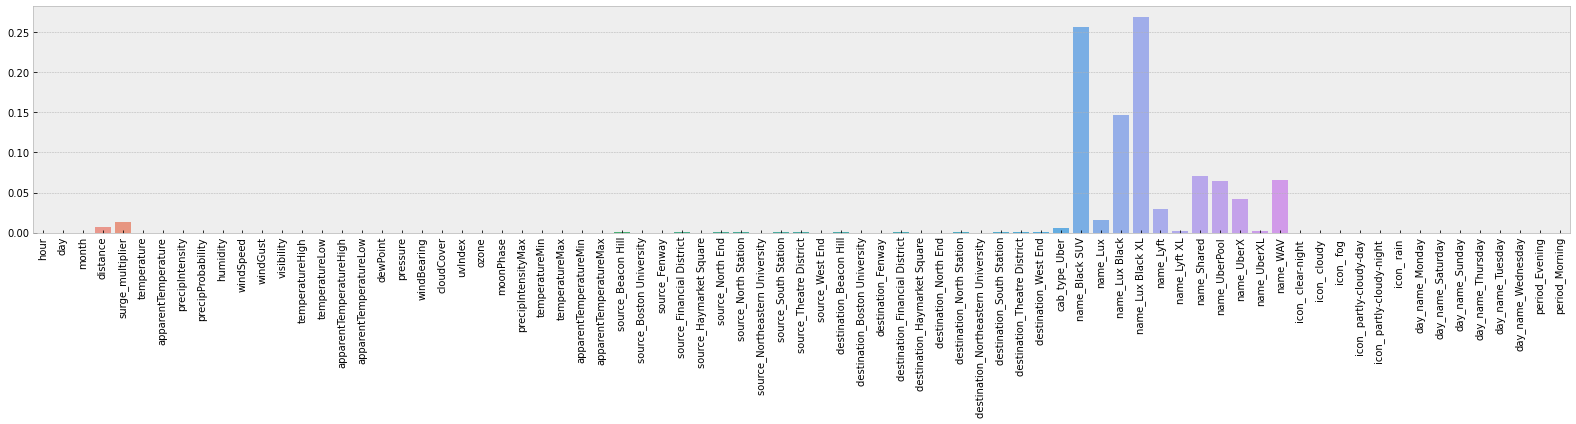

In [ ]:
plt.figure(figsize=[22,6])
sns.barplot(x=x.columns,y=xg.feature_importances_)
plt.xticks(rotation=90);

**Hyper Parameter Tuning**

In [ ]:
parameters={
      "eta":[0.1,0.3,0.7],
      "max_depth":[6,50,100 ]
}
def hpt(x_train,y_train,x_test,y_test,iter=0):
    if iter ==0:   # without PCA
      grid_search=GridSearchCV(estimator=XGBRegressor(),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)
    if iter ==1:   # with PCA
      grid_search=GridSearchCV(estimator=XGBRegressor(),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train_pca,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)

In [ ]:
hpt(x_train,y_train,x_test,y_test,iter=0)

{'eta': 0.3, 'max_depth': 6}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)
0.9673343151442314


In [ ]:
hpt(x_train_pca,y_train,x_test_pca,y_test,iter=1)

{'eta': 0.3, 'max_depth': 6}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.3, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)
0.9661093217717702


##**LightGBM**

In [ ]:
from lightgbm import LGBMRegressor

def lgbm(x_train,y_train,x_test,y_test,iter=0):
    if iter==0:   # without PCA
       lgbm = LGBMRegressor(random_state=0)
       lgbm.fit(x_train, y_train)

       #Accuracy of LGBMRegressor Train
       training_score = r2_score(y_train,lgbm.predict(x_train))
       print('LGBMRegressor train Score is : ' , training_score)
       
       #Accuracy of KNeighborsRegressor Test
       testing_score = r2_score(y_test,lgbm.predict(x_test))
       print('LGBMRegressor test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(lgbm,x_train,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean())

    if iter == 1:   # with PCA
       lgbm = LGBMRegressor(random_state=0)
       lgbm.fit(x_train_pca, y_train)

       #Accuracy of LGBMRegressor Train
       training_score = r2_score(y_train,lgbm.predict(x_train_pca))
       print('LGBMRegressor train Score is : ' , training_score)

       #Accuracy of LGBMRegressor Test
       testing_score = r2_score(y_test,lgbm.predict(x_test_pca))
       print('LGBMRegressor test Score  is : ' , testing_score)

       print("-----------------------------------------------------")

       #check stability
       scores=cross_val_score(lgbm,x_train_pca,y_train,cv=KFold,n_jobs=-1)
       print("scores: ",scores,"\n")
       print("avg scores on all folds: ",scores.mean()) 

In [ ]:
lgbm(x_train,y_train,x_test,y_test,iter=0)

LGBMRegressor train Score is :  0.9673177650918091
LGBMRegressor test Score  is :  0.9643443182881731
-----------------------------------------------------
scores:  [0.96699446 0.96653324 0.96861363 0.95899076 0.96462977 0.96696072
 0.96785649 0.96686436 0.96742195 0.96842453] 

avg scores on all folds:  0.9663289909717638


In [ ]:
lgbm(x_train_pca,y_train,x_test_pca,y_test,iter=1)

LGBMRegressor train Score is :  0.9672409983013571
LGBMRegressor test Score  is :  0.963818772241083
-----------------------------------------------------
scores:  [0.96576687 0.96589618 0.96813635 0.95878813 0.96451686 0.96641852
 0.96724434 0.96640704 0.96710621 0.96792945] 

avg scores on all folds:  0.9658209938871846


**Hyper Parameter Tuning**

In [ ]:
parameters={
      "learning_rate":[0.1,0.3,0.7],
      "max_depth":[1,6,30,50,100 ]
}
def hpt(x_train,y_train,x_test,y_test,iter=0):
    if iter ==0:   # without PCA
      grid_search=GridSearchCV(estimator=LGBMRegressor(random_state=0),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)
    if iter ==1:   # with PCA
      grid_search=GridSearchCV(estimator=LGBMRegressor(random_state=0),n_jobs=-1,cv=KFold,param_grid=parameters)
      grid_search.fit(x_train_pca,y_train)
      print(grid_search.best_params_)
      print(grid_search.best_estimator_)
      print(grid_search.best_score_)

In [ ]:
hpt(x_train,y_train,x_test,y_test,iter=0)

{'learning_rate': 0.3, 'max_depth': 30}
LGBMRegressor(learning_rate=0.3, max_depth=30, random_state=0)
0.967190608209855


In [ ]:
hpt(x_train_pca,y_train,x_test_pca,y_test,iter=1)

{'learning_rate': 0.3, 'max_depth': 30}
LGBMRegressor(learning_rate=0.3, max_depth=30, random_state=0)
0.9665235295020876


#**PipeLine**

In [ ]:
x_.shape

(92084, 37)

In [ ]:
x_pipe=x_[["source","destination","cab_type","name","surge_multiplier","distance"]]
x_pipe.shape

(92084, 6)

In [ ]:
x_pipe

,source,destination,cab_type,name,surge_multiplier,distance
0,Haymarket Square,North Station,Lyft,Shared,1.0,0.44
1,Haymarket Square,North Station,Lyft,Lux,1.0,0.44
2,Haymarket Square,North Station,Lyft,Lyft,1.0,0.44
3,Haymarket Square,North Station,Lyft,Lux Black XL,1.0,0.44
4,Haymarket Square,North Station,Lyft,Lyft XL,1.0,0.44
...,...,...,...,...,...,...
99995,Back Bay,Northeastern University,Uber,UberXL,1.0,1.22
99996,Back Bay,Northeastern University,Uber,UberX,1.0,1.22
99997,Back Bay,Northeastern University,Uber,UberPool,1.0,1.22
99998,Back Bay,Northeastern University,Uber,WAV,1.0,1.22


In [ ]:
y_pipe=x_["price"]
y_pipe.shape

(92084,)

In [ ]:
numeric_columns=x_pipe.select_dtypes(include="number").columns.tolist()
numeric_columns

['surge_multiplier', 'distance']

In [ ]:
categorical_columns=x_pipe.select_dtypes(include="object").columns.tolist()
categorical_columns

['source', 'destination', 'cab_type', 'name']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_pipeline=Pipeline(steps=[ ("handle missing values",SimpleImputer(strategy="median"))
                                 ,("scaling",StandardScaler(with_mean=False))])
numeric_pipeline

Pipeline(steps=[('handle missing values', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler(with_mean=False))])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline=Pipeline(steps=[ ( "handle missing values",SimpleImputer(strategy="most_frequent") ) ,
                                      ( "handle categorical features",OneHotEncoder(sparse=False,drop="first") ) ,
                                      ( "scaling",StandardScaler(with_mean=False)        )  ])
categorical_pipeline

Pipeline(steps=[('handle missing values',
                 SimpleImputer(strategy='most_frequent')),
                ('handle categorical features',
                 OneHotEncoder(drop='first', sparse=False)),
                ('scaling', StandardScaler(with_mean=False))])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing=ColumnTransformer(transformers=[ ("numeric_features", numeric_pipeline, numeric_columns            ),
                                               ("categorical_features", categorical_pipeline ,categorical_columns) ] , remainder="passthrough"
                                               )
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric_features',
                                 Pipeline(steps=[('handle missing values',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 ['surge_multiplier', 'distance']),
                                ('categorical_features',
                                 Pipeline(steps=[('handle missing values',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('handle categorical features',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False)),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 ['source', 'destination', 'cab_type',
                                  'name'])])

In [ ]:
final_pipeline=Pipeline(steps=[ ("preprocessing",preprocessing),
                                ("pca",PCA(n_components=0.9 ) ),
                                ("modeling",LGBMRegressor(random_state=0,learning_rate=0.3,max_depth=30) )  ])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['surge_multiplier',
                                                   'distance']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('handle '
                                                                   'categorical '
                                                                   'features',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['source', 'destination',
                                                   'cab_type', 'name'])])),
                ('pca', PCA(n_components=0.9)),
                ('modeling',
                 LGBMRegressor(learning_rate=0.3, max_depth=30,
                               random_state=0))])

In [ ]:
final_pipeline.fit(x_pipe,y_pipe)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric_features',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['surge_multiplier',
                                                   'distance']),
                                                 ('categorical_features',
                                                  Pipeline(steps=[('handle '
                                                                   'missing '
                                                                   'values',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('handle '
                                                                   'categorical '
                                                                   'features',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False)),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  ['source', 'destination',
                                                   'cab_type', 'name'])])),
                ('pca', PCA(n_components=0.9)),
                ('modeling',
                 LGBMRegressor(learning_rate=0.3, max_depth=30,
                               random_state=0))])

In [ ]:
ss=pd.DataFrame({"source":"Haymarket Square","destination":"North Station","cab_type":"Lyft","name":"Shared","surge_multiplier":1.0,"distance":0.44 },index=[1])
ss

,source,destination,cab_type,name,surge_multiplier,distance
1,Haymarket Square,North Station,Lyft,Shared,1.0,0.44


In [ ]:
final_pipeline.predict( pd.DataFrame({"source":"Haymarket Square",
                                      "destination":"North Station",
                                      "cab_type":"Lyft",
                                      "name":"Shared",
                                      "surge_multiplier":1.0,
                                      "distance":0.44 } ,index=[1] ) )

array([4.10145933])

In [ ]:
#final_pipeline.predict( ["Haymarket Square","North Station","Lyft","Shared",1.0,0.44 ]) 

#**Save Model**

In [ ]:
import joblib
joblib.dump(final_pipeline,"Uber.pkl")

['Uber.pkl']

#**Deployment**

In [ ]:
x_pipe.columns

Index(['source', 'destination', 'cab_type', 'name', 'surge_multiplier',
       'distance'],
      dtype='object')

In [ ]:
y_pipe

0         5.0
1        11.0
2         7.0
3        26.0
4         9.0
         ... 
99995    11.5
99996     7.5
99997     6.0
99998     7.5
99999    23.0
Name: price, Length: 92084, dtype: float64

In [ ]:
import streamlit as st

In [ ]:
database=pd.concat([x_pipe,y_pipe],axis=1)
database

,source,destination,cab_type,name,surge_multiplier,distance,price
0,Haymarket Square,North Station,Lyft,Shared,1.0,0.44,5.0
1,Haymarket Square,North Station,Lyft,Lux,1.0,0.44,11.0
2,Haymarket Square,North Station,Lyft,Lyft,1.0,0.44,7.0
3,Haymarket Square,North Station,Lyft,Lux Black XL,1.0,0.44,26.0
4,Haymarket Square,North Station,Lyft,Lyft XL,1.0,0.44,9.0
...,...,...,...,...,...,...,...
99995,Back Bay,Northeastern University,Uber,UberXL,1.0,1.22,11.5
99996,Back Bay,Northeastern University,Uber,UberX,1.0,1.22,7.5
99997,Back Bay,Northeastern University,Uber,UberPool,1.0,1.22,6.0
99998,Back Bay,Northeastern University,Uber,WAV,1.0,1.22,7.5


In [ ]:
database.to_csv("database.csv")

In [ ]:
import plotly.express as px

In [82]:
%%writefile Uber.py

import joblib
import lightgbm as ltb
import streamlit as st
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use("bmh")
plt.rc("figure",autolayout=True)
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",titlesize=14,titlepad=10)

database=pd.read_csv("database.csv")
database.drop(columns=["Unnamed: 0"],inplace=True)

visualize_data=pd.read_csv("visualize_data.csv")

model1=joblib.load("Uber.pkl")
model2=joblib.load("reviews.pkl")


def predict_trip_price(source, destination, cab_type, name, surge_multiplier,distance):
    prediction =model.predict( pd.DataFrame({"source":[source],
                                             "destination":[destination],
                                             "cab_type":[cab_type],
                                             "name":[name],
                                             "surge_multiplier":[surge_multiplier],
                                             "distance":[distance] },index=[1] ) )
    return prediction   

def review_evaluate(review):
    prediction =model2.predict( pd.DataFrame( { "review_description":[review] } ,index=[1]) )
    prediction=prediction[0]
    if prediction== 1:
       return "Positive Review"  
    elif prediction==-1:
       return "Positive Review" 

def main():
    
    st.set_page_config(layout="wide")
    st.sidebar.title("Graduation Project")
    st.sidebar.title("")
    page=st.sidebar.radio("Navigation",["Home","Dashboard","Predict","Append","Evaluate"])  
    st.sidebar.title("") 
    st.sidebar.title("")
    st.sidebar.title("")
    st.sidebar.title("")
    st.sidebar.title("")
    st.sidebar.title("")
    st.sidebar.title("")
    st.sidebar.subheader("Created By: Mahmoud Eltabakh")
    
    if page=="Home":

       html_temp = """
            <div style="background-color:tomato;padding:10px">
            <h2 style="color:white;">About This Project.</h2>
            </div>
                   """
       st.markdown(html_temp,unsafe_allow_html=True)

       st.markdown("""""")
       st.markdown("One of problems facing transport companies is the Dynamic price problem")
       st.markdown("Where the company is required to determine the best and most appropriate price for a trip, taking into account the increase in its revenue and profit")
       st.markdown("""""")
       st.subheader("User can: ")
       st.markdown(" 1) Know price of the trip ")
       st.markdown(" 2) Evaluate the App in arabic")
       st.subheader(" There are 2 evaluation cases")
       st.code(" ( 1)  > > Positive")
       st.code(" (-1)  > > Negative")

    if page=="Append":
       html_temp = """
                      <div style="background-color:tomato;padding:10px">
                      <h2 style="color:white;text-align:center;">Contribute to database</h2>
                      </div>
                   """
       st.markdown(html_temp,unsafe_allow_html=True)
       st.title("")
       df=database.tail()
       if st.checkbox("Show data",value=False) :
          st.dataframe(df)
      
       source=st.selectbox("Mark your place.",['Haymarket Square','Back Bay','North End','North Station','Beacon Hill',
                                               'Boston University','Fenway','South Station','Theatre District','West End',
                                               'Financial District','Northeastern University'] )
       destination=st.selectbox("Select your destination.",['North Station', 'Northeastern University', 'West End','Haymarket Square',
                                                            'South Station', 'Fenway','Theatre District','Beacon Hill', 'Back Bay', 
                                                            'North End', 'Financial District','Boston University'])
       cab_type=st.selectbox("Choose company name",['Lyft', 'Uber'])
       name=st.selectbox("Choose type of car",['Shared','Lux','Lyft','Lux Black XL','Lyft XL','Lux Black','UberXL','Black',
                                               'UberX','WAV','Black SUV','UberPool','Taxi'])
       distance=st.number_input("Estimated distance",min_value=0.0,max_value=10.0,step=0.1)  
       surge_multiplier=st.slider("Value added",min_value=1.0,max_value=3.0,step=0.1) 
       price=st.number_input("Enter price of trip.",min_value=1.0,max_value=100.0,step=0.1)


       if st.button("Submit"):
          to_add={
                  "source":source,
                  "destination":destination,
                  "cab_type":cab_type,
                  "name":name,
                  "surge_multiplier":surge_multiplier,
                  "distance":distance,
                  "price":price
                 }
        
          to_add=pd.DataFrame(to_add,index= [len(database)] )
          to_add.to_csv("database.csv",mode="a",header=False)
          st.success("Submited Successfully")

       if st.checkbox("Show updated data",value=False) :
          st.dataframe(database.tail())

    if page=="Predict":
       html_temp = """
                        <div style="background-color:tomato;padding:10px">
                        <h2 style="color:white;text-align:center;">Find out price of trip</h2>
                        </div>
                   """
       st.markdown(html_temp,unsafe_allow_html=True)
     
       st.title("")
       source=st.selectbox("Mark your place.",['Haymarket Square','Back Bay','North End','North Station','Beacon Hill',
                                               'Boston University','Fenway','South Station','Theatre District','West End',
                                               'Financial District','Northeastern University'] )
       destination=st.selectbox("Select your destination.",['North Station', 'Northeastern University', 'West End','Haymarket Square',
                                                            'South Station', 'Fenway','Theatre District','Beacon Hill', 'Back Bay', 
                                                            'North End', 'Financial District','Boston University'])
       cab_type=st.selectbox("Choose company name",['Lyft', 'Uber'])
       name=st.selectbox("Choose type of car",['Shared','Lux','Lyft','Lux Black XL','Lyft XL','Lux Black','UberXL','Black',
                                               'UberX','WAV','Black SUV','UberPool','Taxi'])
       distance=st.number_input("Estimated distance",min_value=0.0,max_value=10.0,step=0.1)  
       surge_multiplier=st.slider("Value added",min_value=1.0,max_value=3.0,step=0.1) 

       result=""
       if st.button("Predict"):
          result=predict_trip_price(source,destination,cab_type,name,surge_multiplier,distance)
          st.success("Expected trip price : {} $".format(result)) 

    if page=="Dashboard":
       html_temp = """
            <div style="background-color:tomato;padding:10px">
            <h2 style="color:white;text-align:center;">Insights from data.</h2>
            </div>
                   """
       st.markdown(html_temp,unsafe_allow_html=True)
       st.title("")
 
       df=visualize_data.tail()
       if st.checkbox("Show data",value=False) :
          st.dataframe(df)

       kind=st.selectbox("What kind of Graph?",["Non-Interactive","Interactive"])
       st.title("")
       if kind=="Non-Interactive":
          col1,col2=st.columns(2)
          with col1:

               sns.countplot(x="day",data=visualize_data,hue="cab_type")
               st.subheader("The number of trips for each company during the days of month")
               st.pyplot()

               st.subheader("Distribution of weather conditions on number of trips")
               s=visualize_data["icon"].value_counts().reset_index(name="count").rename(columns={"index":"icon"})
               plt.pie(s["count"],labels=s["icon"],autopct="%0.1f%%",explode=[0.1,0,0,0,0,0,0])
               st.pyplot()
               st.title("")
               st.title("")

               st.subheader("Average distance traveled for each company")
               sns.barplot(x='cab_type',y="distance",data=visualize_data)
               st.pyplot()
 
               st.subheader("The number of trips made by each each type of each company")
               plt.xticks(rotation=45)
               n=visualize_data.groupby(["name","cab_type"])[["id"]].count().rename(columns={"id":"count"}).stack().reset_index(name="count").drop("level_2",axis=1).sort_values(by="count")
               sns.barplot(x="name",y="count",data=n,hue="cab_type")           
               st.pyplot() 
             
               st.subheader("The number of trips for each company over the month")
               sns.countplot(x="month",data=visualize_data,hue="cab_type")
               st.pyplot()

               st.subheader("The number of trips for each company over weather conditions")
               sns.countplot(x="icon",data=visualize_data,hue="cab_type")
               plt.xticks(rotation=45)
               st.pyplot()

               st.subheader("The relationship between the time period and price of the trip")
               sns.barplot(x="period",y="price",data=visualize_data)
               st.pyplot()


          with col2:
            
               sns.countplot(x="hour",data=visualize_data,hue="cab_type")
               st.subheader("The number of trips for each company during the hours of day")
               st.pyplot()

               c=visualize_data.groupby("cab_type")["id"].size().reset_index(name="count")
               st.subheader("Most requested company")
               plt.pie(c["count"],labels=c["cab_type"],autopct="%1.1f%%")
               st.pyplot()

               st.subheader("The average trip price for each company.")
               st.title("")
               sns.barplot(x="cab_type",y="price",estimator=np.mean,data=visualize_data)
               st.pyplot()

               st.subheader("Average prices of trips carried out by each type of each company")
               plt.xticks(rotation=45)
               sns.barplot(x="name",y="price",hue="cab_type",data=visualize_data) 
               st.pyplot()

               st.subheader("Average trips prices for each month")
               st.title("")
               sns.barplot(x="month",y="price",data=visualize_data)
               st.pyplot()

               st.subheader("The relationship between weather conditions and trip prices")
               s=visualize_data.groupby("icon")[["price"]].mean().sort_values(by="price",ascending=False)
               sns.barplot(x=s.index,y="price",data=s)
               plt.xticks(rotation=45)
               st.pyplot()

               st.subheader("Trip prices throughout the week for both companies")
               sns.barplot(x="day_name",y="price",hue="cab_type",data=visualize_data)
               st.pyplot() 


          on,tw,thr=st.columns(3)
          with on:
               m=visualize_data["month"].value_counts().reset_index(name="count").rename(columns={"index":"month"})
               st.subheader("Trips every month")
               st.title("")
               plt.pie(m["count"],labels=m["month"],autopct="%1.1f%%")
               st.pyplot()

          with tw:
               st.subheader("Distribution of number of trips on the days of the week")
               v=visualize_data["day_name"].value_counts().reset_index(name="count").rename(columns={"index":"day_name"})
               plt.pie(v["count"],labels=v.day_name,autopct="%0.1f%%",explode=[0.1,0.1,0,0,0,0,0])  
               st.pyplot() 
          with thr:
               st.subheader("Distribution of number of trips to the periods of the day")
               v=visualize_data["period"].value_counts().reset_index(name="count").rename(columns={"index":"period"})
               plt.pie(v["count"],labels=v.period,autopct="%0.1f%%",explode=[0.1,0,0])
               st.pyplot()


          one,two=st.columns(2)
          with one :
               s=visualize_data.groupby("source")[["id"]].count().rename(columns={"id":"Number of Trips"}).sort_values(by="Number of Trips",ascending=False)
               st.subheader("The number of trips originating from each source")
               sns.barplot(x=s["Number of Trips"],y=s.index)
               st.pyplot()
               st.title("")

          with two :
               s=visualize_data.groupby("destination")[["id"]].count().rename(columns={"id":"Number of Trips"}).sort_values(by="Number of Trips",ascending=False)
               st.subheader("The number of trips originating from each destination")
               sns.barplot(x=s["Number of Trips"],y=s.index)
               st.pyplot()
            
          t=visualize_data.groupby(["source","destination"])[["id"]].count().sort_values(by="id",ascending=False).rename(columns={"id":"count"})
          t=t.stack().reset_index(name="count").drop("level_2",axis=1).head(15)
          def trip (x):
              x["trip"]=x["source"] + " --> "+ x["destination"]
              return x
          t=t.apply(trip,axis=1)
          st.subheader("Most popular trips")
          sns.barplot(y="trip",x="count",data=t)
          st.pyplot()


       if kind=="Interactive":

          col1,col2=st.columns(2)

          with col1:

               st.subheader("The number of trips for each company during the days of month")
               fig = px.histogram(visualize_data, x="day", color="cab_type",barmode="group", nbins=len(visualize_data["day"].unique()),template="plotly_dark")
               fig.update_layout(title="Count per Day and Cab Type",xaxis_title="Day",yaxis_title="Count")
               st.plotly_chart(fig)

               st.subheader("Distribution of weather conditions on number of trips")
               s=visualize_data["icon"].value_counts().reset_index(name="count").rename(columns={"index":"icon"})
               fig = px.pie(s, values='count', names='icon',title='Distribution of cab rides by weather icon',hole=0.5,labels={'count': 'Number of Rides'}) 
               st.plotly_chart(fig)
  

               st.subheader("Average distance traveled for each company")
               fig = px.bar(visualize_data, x='cab_type', y='distance', color='cab_type', title='Distance by Cab Type')
               st.plotly_chart(fig)
 
               st.subheader("The number of trips made by each each type of each company")
               plt.xticks(rotation=45)
               n=visualize_data.groupby(["name","cab_type"])[["id"]].count().rename(columns={"id":"count"}).stack().reset_index(name="count").drop("level_2",axis=1).sort_values(by="count")
               fig = px.bar(n, x="name", y="count", color="cab_type", color_discrete_sequence=["#fdaa48", "#2a75bb"])
               st.plotly_chart(fig)

               st.subheader("The number of trips for each company over the month")
               fig = px.histogram(visualize_data, x="month", color="cab_type")
               fig.update_layout(barmode="group")
               st.plotly_chart(fig)

               st.subheader("The number of trips for each company over weather conditions")
               fig = px.histogram(visualize_data, x="icon", color="cab_type")
               st.plotly_chart(fig)

               st.subheader("The relationship between the time period and price of the trip")
               dd=visualize_data.groupby("period")[["price"]].mean()
               fig = px.bar(dd, x=dd.index, y=dd.price, color_discrete_sequence=['blue'], barmode='group')
               fig.update_layout(title='Price vs Period')
               st.plotly_chart(fig)


          with col2:

               st.subheader("The number of trips for each company during the hours of day")
               fig = px.histogram(visualize_data, x="hour", color="cab_type",barmode="group", nbins=len(visualize_data["day"].unique()),template="plotly_dark")
               fig.update_layout(title="Distribution of Cab Rides by Hour",xaxis_title="hour",yaxis_title="Count")
               st.plotly_chart(fig)

               c=visualize_data.groupby("cab_type")["id"].size().reset_index(name="count")
               st.subheader("Most requested company")
               fig = go.Figure(data=[go.Pie(labels=c["cab_type"], values=c["count"], hole=0.3)])
               fig.update_layout(title="Percentage of Cab Type Usage")
               st.plotly_chart(fig)


               st.subheader("The average trip price for each company.")
               fig = px.bar(visualize_data, x="cab_type", y="price",color="cab_type", title="Average Price per Cab Type")
               st.plotly_chart(fig)
             
               st.subheader("Average prices of trips carried out by each type of each company")
               fig = px.bar(visualize_data, x="name", y="price", color="cab_type",title="Price by Cab Type and Name")
               st.plotly_chart(fig)

               st.subheader("Average trips prices for each month")
               fig = go.Figure()
               fig.add_trace(go.Bar(x=visualize_data['month'], y=visualize_data['price']))
               fig.update_layout(title="Average Trip Price by Month",xaxis_title="Month",yaxis_title="Price")
               st.plotly_chart(fig)

               st.subheader("The relationship between weather conditions and trip prices")
               s=visualize_data.groupby("icon")[["price"]].mean().sort_values(by="price",ascending=False)
               fig = px.bar(x=s.index, y="price", data_frame=s)
               fig.update_layout(title='Bar Plot', xaxis_title='Index', yaxis_title='Price')
               st.plotly_chart(fig)

               st.subheader("Trip prices throughout the week for both companies")
               fig = px.bar(visualize_data, x='day_name', y='price', color='cab_type', barmode='group')
               fig.update_layout(title='Price by Day and Cab Type', xaxis_title='Day of Week', yaxis_title='Price')
               st.plotly_chart(fig)
    

          on,tw,thr=st.columns(3)
          with on:
               m=visualize_data["month"].value_counts().reset_index(name="count").rename(columns={"index":"month"})
               st.subheader("Trips every month")
               fig = go.Figure(data=[go.Pie(labels=m["month"], values=m["count"])])
               fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,marker=dict(colors=px.colors.qualitative.Plotly))
               st.plotly_chart(fig)

          with tw:
               st.subheader("Distribution of number of trips on the days of the week")
               v=visualize_data["day_name"].value_counts().reset_index(name="count").rename(columns={"index":"day_name"})
               fig = px.pie(v, values='count', names='day_name',title='Distribution of Rides by Day',labels={'count': 'Number of Rides'})
               st.plotly_chart(fig)
               
          with thr:
               st.subheader("Distribution of number of trips to the periods of the day")
               v=visualize_data["period"].value_counts().reset_index(name="count").rename(columns={"index":"period"})
               fig = px.pie(v, values='count', names='period',title='Distribution of Rides by Period',labels={'count': 'Number of Rides'})
               st.plotly_chart(fig)

          one,two=st.columns(2)
          with one :
               s=visualize_data.groupby("source")[["id"]].count().rename(columns={"id":"Number of Trips"}).sort_values(by="Number of Trips",ascending=False)
               st.subheader("The number of trips originating from each source")
               data = go.Bar(x=s["Number of Trips"], y=s.index, orientation="h")
               layout = go.Layout(title="Number of Trips per Hour", xaxis_title="Number of Trips", yaxis_title="Hour of the Day")
               fig = go.Figure(data=data, layout=layout)
               st.plotly_chart(fig)

          with two :
               s=visualize_data.groupby("destination")[["id"]].count().rename(columns={"id":"Number of Trips"}).sort_values(by="Number of Trips",ascending=False)
               st.subheader("The number of trips originating from each destination")
               fig = go.Figure()
               fig.add_trace(go.Bar(x=s["Number of Trips"],y=s.index,orientation='h'))
               fig.update_layout(title='Number of Trips by Weekday',xaxis_title='Number of Trips',yaxis_title='Weekday')
               st.plotly_chart(fig)

          t=visualize_data.groupby(["source","destination"])[["id"]].count().sort_values(by="id",ascending=False).rename(columns={"id":"count"})
          t=t.stack().reset_index(name="count").drop("level_2",axis=1).head(15)
          def trip (x):
              x["trip"]=x["source"] + " --> "+ x["destination"]
              return x
          t=t.apply(trip,axis=1)
          st.subheader("Most popular trips")
          fig = go.Figure(go.Bar(x=t["count"],y=t["trip"],orientation='h'))
          fig.update_layout(title="Trips per category",xaxis_title="Count",yaxis_title="Trip category")
          st.plotly_chart(fig)
    if page=="Evaluate":
       html_temp = """
            <div style="background-color:tomato;padding:10px">
            <h2 style="color:white;text-align:center;">Evaluate The App.</h2>
            </div>
                   """
       st.markdown(html_temp,unsafe_allow_html=True)
       st.title("")       
       review=st.text_area("Write your review of app in arabic")

       result=""
       if st.button("Evaluate"):
          result=review_evaluate(review)
          st.success("Evaluation : {} ".format(result)) 

main()

Overwriting Uber.py


In [83]:
from pyngrok import ngrok
ngrok.kill()
#2NQcbOQNTVEt0zYwS7BIEcmLftD_9smHeSkwpxcEqtnrBHnu
NGROK_AUTH_TOKEN="2NQnN7hWoB9am9fy7XKSIvNvQ3h_mcWNR9Q5wfVmke19tNb"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [84]:
ngrok.connect(8501)

<NgrokTunnel: "http://340a-34-125-72-152.ngrok.io" -> "http://localhost:8501">

In [85]:
! streamlit run Uber.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.72.152:8501

2023-03-31 07:27:24.144 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 565, in _run_script
    exec(code, module.__dict__)
  File "/content/Uber.py", line 428, in <module>
    main()
  File "/content/Uber.py", line 425, in main
    result=review_evaluate(review)
  File "/content/Uber.py", line 35, in review_evaluate
    prediction =model2.predict( pd.DataFrame( { "review_description":[review] } ,index=[1]) )
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 105, in predict
    X = self._check_X(X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py", line 579, in _check_X
    return self._validate_data(X, accept_sparse="csr", reset=False)
  File "/usr/local/lib/python3.9/dist-packages/sklearn

In [ ]:
visualize_data.iloc[:70000,].to_csv("visualize_data.csv")

In [ ]:
visualize_data.shape

(92084, 44)

In [ ]:
visualize_data.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
visualize_data.shape

(92084, 44)

In [ ]:
visualize_data=pd.read_csv("/content/visualize_data.csv")
visualize_data.head()

,Unnamed: 0,id,hour,day,month,datetime,source,destination,cab_type,product_id,...,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,day_name,period
0,0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,lyft_line,...,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07,Sunday,Morning
1,1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,lyft_premier,...,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92,Tuesday,Morning
2,2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,lyft,...,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12,Wednesday,Morning
3,3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,lyft_luxsuv,...,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53,Friday,Morning
4,4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,lyft_plus,...,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75,Thursday,Morning


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
d=visualize_data.groupby("day")["id"].size().sort_values(ascending=False).reset_index(name="count")
fig = px.bar(d, x="day", y="count", color="day",
             color_discrete_sequence=px.colors.qualitative.Pastel,
             template="plotly_dark")
fig.update_layout(title="Count per Day",
                  xaxis_title="Day",
                  yaxis_title="Count")
fig.show()

# out of project

##**Sentiment Analysis**

##Data Defination

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv('/content/drive/MyDrive/Egyptian_Companies_Reviews.csv')
df.drop(columns=["Unnamed: 0"],inplace=True)
df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من ٢٠ ي...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,very unique and practical app,1,DiDi


In [15]:
df.iloc[3]

review_description    كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...
rating                                                                0
company                                                         inDrive
Name: 3, dtype: object

##Data Cleaning

In [16]:
df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من ٢٠ ي...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,very unique and practical app,1,DiDi


**Check Null Values**

In [17]:
df.isnull().sum()

review_description    0
rating                0
company               0
dtype: int64

**Check Duplicates**

In [18]:
df.duplicated().sum()

4

In [19]:
df.shape

(15694, 3)

In [20]:
df.drop_duplicates(keep="first",inplace=True)

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(15690, 3)

##EDA

In [120]:
df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من ٢٠ ي...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,very unique and practical app,1,DiDi


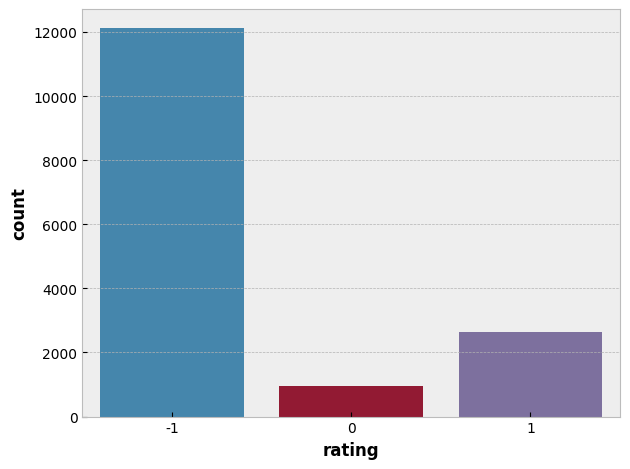

In [121]:
sns.countplot(x="rating",data=df);

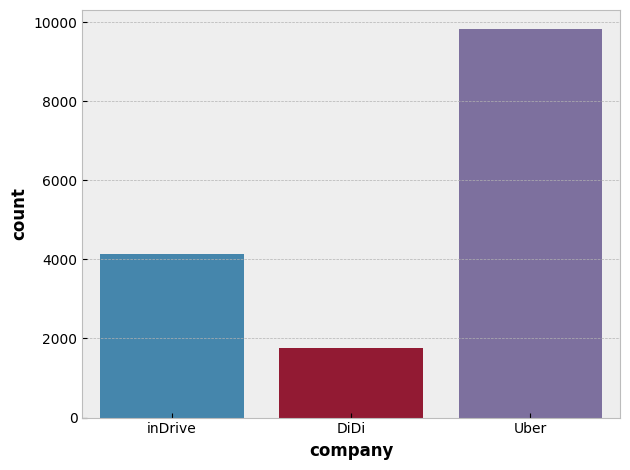

In [122]:
sns.countplot(x="company",data=df);

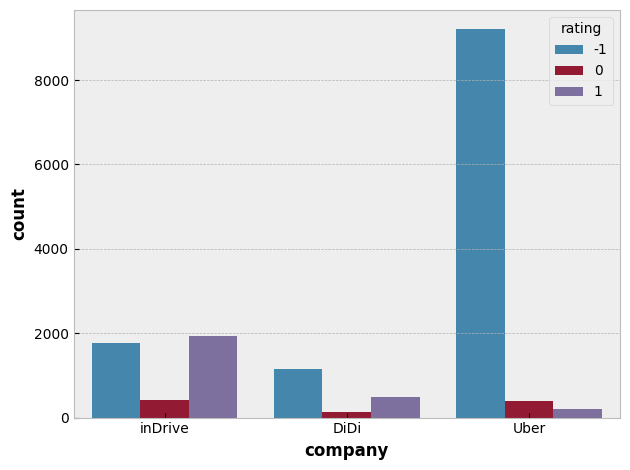

In [123]:
sns.countplot(x="company",data=df,hue="rating");

##Data PreProcessing

In [23]:
df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من ٢٠ ي...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,very unique and practical app,1,DiDi


In [24]:
import re
import nltk
nltk.download('punkt')
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Remove Numbers**

In [25]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

df["review_description"] = df["review_description"].apply(lambda x: remove_numbers(x))

df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من يو...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,very unique and practical app,1,DiDi


**Stemming**

In [26]:
from nltk.stem import PorterStemmer
from nltk import word_tokenize

def stemming(text):
    stemmer = PorterStemmer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        stem_word = stemmer.stem(tokens[i])
        tokens[i] = stem_word
    return " ".join(tokens)

df["review_description"] = df["review_description"].apply(lambda x: stemming(x))

df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من يوم ...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,veri uniqu and practic app,1,DiDi


**Lemmatizing**

In [27]:

from nltk.stem import WordNetLemmatizer

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

df["review_description"] = df["review_description"].apply(lambda x: lemmatizing(x))

df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من يوم ...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,veri uniqu and practic app,1,DiDi


**Removing Punctuations OR Special Chars**

In [28]:
import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df["review_description"] = df["review_description"].apply(lambda x: remove_punctuation(x))

df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون من اربع ارقام بيقولى...,-1,inDrive
1,هو ليه البرنامج مش بيدعم كل الموبيلات البرنامج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك منذ اكتر من يوم ...,-1,inDrive
3,كنت عايز اسجل معاكو عربية و مش عارف اعمل ايه ع...,0,inDrive
4,veri uniqu and practic app,1,DiDi


**Removing StopWords**

In [29]:

from nltk.corpus import stopwords

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("arabic"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

df["review_description"] = df["review_description"].apply(lambda x: remove_stopwords(x))

df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون اربع ارقام بيقولى حد...,-1,inDrive
1,ليه البرنامج مش بيدعم الموبيلات البرنامج بيخرج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك اكتر يوم توجد اى...,-1,inDrive
3,كنت عايز اسجل معاكو عربية مش عارف اعمل ايه عرب...,0,inDrive
4,veri uniqu and practic app,1,DiDi


**Handle Imbalanced Classes**

In [30]:
!pip install nlpaug
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import nlpaug.augmenter.word.context_word_embs as aug
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

In [32]:
df.head()

,review_description,rating,company
0,مش عاوز يبعت الكود المكون اربع ارقام بيقولى حد...,-1,inDrive
1,ليه البرنامج مش بيدعم الموبيلات البرنامج بيخرج...,-1,DiDi
2,بنطلب إعادة اضافة نقطة التحرك اكتر يوم توجد اى...,-1,inDrive
3,كنت عايز اسجل معاكو عربية مش عارف اعمل ايه عرب...,0,inDrive
4,veri uniqu and practic app,1,DiDi


In [33]:
df['rating'].value_counts()

-1    12110
 1     2630
 0      950
Name: rating, dtype: int64

In [34]:
from tqdm.auto import tqdm
from tqdm import tqdm
from sklearn.utils import shuffle

In [35]:
"""
def augmentMyLabel1(df, augmenter, samples):
    augmented_texts = []
    # select only the minority class samples
    positive_df = df[df['rating'] == 1].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(positive_df), samples)):
        # generating 'n_samples' augmented texts
        augmented_text = augmenter.augment(positive_df['review_description'].iloc[i])
        augmented_texts.append(augmented_text)
    
    data = {
        'rating': 1,
        'review_description': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

aug_df1 = augmentMyLabel1(df, augmenter, samples=8000)
"""

"\ndef augmentMyLabel1(df, augmenter, samples):\n    augmented_texts = []\n    # select only the minority class samples\n    positive_df = df[df['rating'] == 1].reset_index(drop=True) # removes unecessary index column\n    for i in tqdm(np.random.randint(0, len(positive_df), samples)):\n        # generating 'n_samples' augmented texts\n        augmented_text = augmenter.augment(positive_df['review_description'].iloc[i])\n        augmented_texts.append(augmented_text)\n    \n    data = {\n        'rating': 1,\n        'review_description': augmented_texts\n    }\n    aug_df = pd.DataFrame(data)\n    df = shuffle(df.append(aug_df).reset_index(drop=True))\n    return df\n\naug_df1 = augmentMyLabel1(df, augmenter, samples=8000)\n"

In [36]:
#aug_df1.to_csv("balance_data.csv")

In [37]:
aug_df1=pd.read_csv("/content/balance_data.csv")
aug_df1.drop(columns=["Unnamed: 0","company"],inplace=True)
aug_df1.head()

,review_description,rating
0,تطبيق فاشل مفيش رقم خدمه ثابت المحڤظه لزم يكون...,-1
1,التطبيق اصبح سيء للغايه اصبح يفتح عندي خالص,-1
2,للماذا عندما اقوم بتنشيط مستفيد بنك محلي يتعذر...,-1
3,تطبيق سيئ اقدر انشط حساب اي مستفيد والرقم السر...,-1
4,البرنامج اصبح يعمل التحديث حسبي الله ونعم الوكيل,-1


In [38]:
aug_df1.isnull().sum()

review_description    42
rating                 0
dtype: int64

In [39]:
aug_df1.dropna(inplace=True)
aug_df1.isnull().sum()

review_description    0
rating                0
dtype: int64

In [40]:
aug_df1.rating.value_counts()

-1    12105
 1    10614
 0      929
Name: rating, dtype: int64

In [41]:
index=aug_df1[aug_df1["rating"]==0].index
len(index)

929

In [42]:
aug_df1.drop(index=index,inplace=True)

In [43]:

aug_df1.rating.value_counts()

-1    12105
 1    10614
Name: rating, dtype: int64

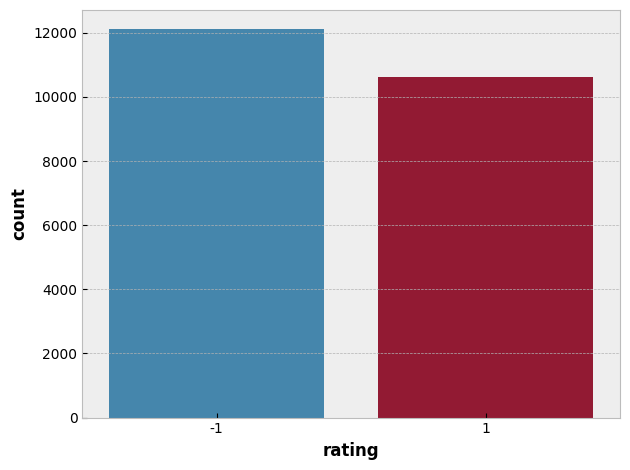

In [44]:
sns.countplot(data=aug_df1,x="rating");

In [45]:
def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

aug_df1["review_description"] = aug_df1["review_description"].apply(lambda x: remove_numbers(x))

aug_df1.head()

,review_description,rating
0,تطبيق فاشل مفيش رقم خدمه ثابت المحڤظه لزم يكون...,-1
1,التطبيق اصبح سيء للغايه اصبح يفتح عندي خالص,-1
2,للماذا عندما اقوم بتنشيط مستفيد بنك محلي يتعذر...,-1
3,تطبيق سيئ اقدر انشط حساب اي مستفيد والرقم السر...,-1
4,البرنامج اصبح يعمل التحديث حسبي الله ونعم الوكيل,-1


In [46]:
x_pipe=aug_df1["review_description"]
y_pipe=aug_df1["rating"]

**Text Representation Using TFIDF**

In [47]:
aug_df1["review_description"].values

array(['تطبيق فاشل مفيش رقم خدمه ثابت المحڤظه لزم يكون عندك رصيد عشان تفتح التطبيق فيش مشكله يقول ليك الحساب ينتمي هاتف اخر لزم تمسح التطبيق وتثبت جديد يعني عايزاك باقه خاصه حذف وتثبيت قرف',
       'التطبيق اصبح سيء للغايه اصبح يفتح عندي خالص',
       'للماذا عندما اقوم بتنشيط مستفيد بنك محلي يتعذر بعدم القدره تنفيذ طلبي ويرجى الاتصال بالهاتف المصرفي منكم تعجيييييز ؟؟؟؟',
       ..., 'يمكننى ان انضم لفريق العمل سيارة راكب ياريت حد يتواصل معايا',
       "['[UNK] انه yemen تطبيق م الممتاز س تكرمتم tunisian عايز اعرف ك محطة [UNK] كورنيش morocco النيل ا بطرة ت البلد لا']",
       "['the الباص islamic ممتاز... والخدمة arabic ممتازة']"],
      dtype=object)

In [48]:
x_aug=aug_df1["review_description"]
y_aug=aug_df1["rating"]

In [49]:
x_aug.shape

(22719,)

In [50]:
y_aug.shape

(22719,)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [52]:
data=tfidf.fit_transform(x_aug).toarray()
col=tfidf.get_feature_names_out()
x_aug=pd.DataFrame(data,columns=col)
x_aug

,abbas,abd,abdelruenbnj,abdullah,about,abrams,abroad,abroken,absolutely,abu,...,ﻻتعمل,ﻻنه,ﻻيذهب,ﻻيرتقي,ﻻيشتغل,ﻻيعمل,ﻻيفتح,ﻻيقبل,ﻻين,ﻻيوجد
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
tfidf.vocabulary_

{'تطبيق': 10188,
 'فاشل': 14615,
 'مفيش': 19046,
 'رقم': 12514,
 'خدمه': 11788,
 'ثابت': 10875,
 'المحڤظه': 5988,
 'لزم': 16266,
 'يكون': 25940,
 'عندك': 14354,
 'رصيد': 12482,
 'عشان': 14136,
 'تفتح': 10434,
 'التطبيق': 4288,
 'فيش': 14989,
 'مشكله': 18696,
 'يقول': 25894,
 'ليك': 17205,
 'الحساب': 4578,
 'ينتمي': 26014,
 'هاتف': 20183,
 'اخر': 2334,
 'تمسح': 10682,
 'وتثبت': 22229,
 'جديد': 11080,
 'يعني': 25763,
 'عايزاك': 14004,
 'باقه': 7310,
 'خاصه': 11717,
 'حذف': 11417,
 'وتثبيت': 22230,
 'قرف': 15122,
 'اصبح': 2935,
 'سيء': 13129,
 'للغايه': 16835,
 'يفتح': 25796,
 'عندي': 14367,
 'خالص': 11731,
 'للماذا': 16886,
 'عندما': 14358,
 'اقوم': 3271,
 'بتنشيط': 8050,
 'مستفيد': 18576,
 'بنك': 8958,
 'محلي': 18230,
 'يتعذر': 25113,
 'بعدم': 8581,
 'القدره': 5634,
 'تنفيذ': 10770,
 'طلبي': 13818,
 'ويرجى': 24629,
 'الاتصال': 3583,
 'بالهاتف': 7721,
 'المصرفي': 6183,
 'منكم': 19410,
 'تعجيييييز': 10299,
 'سيئ': 13136,
 'اقدر': 3231,
 'انشط': 6867,
 'حساب': 11474,
 'اي': 7056,
 'والرقم'

In [54]:
x_aug.shape

(22719, 26177)

In [55]:
y_aug.shape

(22719,)

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_aug,y_aug,test_size=0.2,random_state=0,stratify=y_aug)

##Modeling

##**Naive Bayes**

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [58]:
print("Training\n",classification_report(y_train,nb.predict(x_train)))

Training
               precision    recall  f1-score   support

          -1       0.97      0.97      0.97      9684
           1       0.97      0.97      0.97      8491

    accuracy                           0.97     18175
   macro avg       0.97      0.97      0.97     18175
weighted avg       0.97      0.97      0.97     18175



In [59]:
y_pred=nb.predict(x_test)
print("Testing\n",classification_report(y_test,y_pred))

Testing
               precision    recall  f1-score   support

          -1       0.96      0.95      0.95      2421
           1       0.94      0.96      0.95      2123

    accuracy                           0.95      4544
   macro avg       0.95      0.95      0.95      4544
weighted avg       0.95      0.95      0.95      4544



##**catboost**

In [74]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.2 MB/s eta 0:00:00


In [ ]:
print(catboost.__version__)

In [77]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=42)
cb.fit(x_train, y_train)

0:	learn: 0.6101732	total: 412ms	remaining: 40.8s
1:	learn: 0.5574166	total: 791ms	remaining: 38.7s
2:	learn: 0.5264903	total: 1.17s	remaining: 37.8s
3:	learn: 0.4997636	total: 1.54s	remaining: 37.1s
4:	learn: 0.4779261	total: 1.92s	remaining: 36.5s
5:	learn: 0.4632347	total: 2.36s	remaining: 36.9s
6:	learn: 0.4488179	total: 2.77s	remaining: 36.9s
7:	learn: 0.4374526	total: 3.15s	remaining: 36.3s
8:	learn: 0.4237615	total: 3.59s	remaining: 36.3s
9:	learn: 0.4146651	total: 4.05s	remaining: 36.5s
10:	learn: 0.4061584	total: 4.58s	remaining: 37.1s
11:	learn: 0.3994363	total: 4.98s	remaining: 36.6s
12:	learn: 0.3923097	total: 5.46s	remaining: 36.5s
13:	learn: 0.3852426	total: 6.11s	remaining: 37.5s
14:	learn: 0.3777683	total: 6.98s	remaining: 39.5s
15:	learn: 0.3721678	total: 7.57s	remaining: 39.7s
16:	learn: 0.3674969	total: 8.23s	remaining: 40.2s
17:	learn: 0.3602542	total: 9.04s	remaining: 41.2s
18:	learn: 0.3552818	total: 9.72s	remaining: 41.4s
19:	learn: 0.3510595	total: 10.3s	remaini

In [78]:
print("Training\n",classification_report(y_train,cb.predict(x_train)))

Training
               precision    recall  f1-score   support

          -1       0.86      0.99      0.92      9684
           1       0.98      0.82      0.89      8491

    accuracy                           0.91     18175
   macro avg       0.92      0.90      0.91     18175
weighted avg       0.92      0.91      0.91     18175



In [80]:
y_pred = cb.predict(x_test)
print("Testing\n",classification_report(y_test,y_pred))

Testing
               precision    recall  f1-score   support

          -1       0.85      0.98      0.91      2421
           1       0.97      0.80      0.88      2123

    accuracy                           0.90      4544
   macro avg       0.91      0.89      0.89      4544
weighted avg       0.91      0.90      0.89      4544



##**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

In [ ]:
print("Training\n",classification_report(y_train,gb.predict(x_train)))

In [ ]:
y_pred = gb.predict(x_test)
print("Testing\n",classification_report(y_test,y_pred))

##**SVC**

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

In [ ]:
print("Training\n",classification_report(y_train,cvc.predict(x_train)))

In [ ]:
y_pred = svc.predict(x_test)
print("Testing\n",classification_report(y_test,y_pred))

##**LSTM**

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=26177, output_dim=128, input_length=26177))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


##**ANN**

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the ANN model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=len(col)))
model.add(Dropout(0.2))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

##**Pipeline**

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
preprocessing=Pipeline(steps=[ ("Text Representation",TfidfVectorizer() )      ])         
preprocessing

Pipeline(steps=[('Text Representation', TfidfVectorizer())])

In [61]:
from sklearn.compose import ColumnTransformer
pipeline=ColumnTransformer(            [       ("preprocessing",preprocessing,["review_description"])         ]  ,remainder="passthrough"              )
pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('preprocessing',
                                 Pipeline(steps=[('Text Representation',
                                                  TfidfVectorizer())]),
                                 ['review_description'])])

In [62]:
final_pipeline=Pipeline( steps=[ ( "preprocessing",pipeline)   , ("modeling",MultinomialNB())    ])
final_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocessing',
                                                  Pipeline(steps=[('Text '
                                                                   'Representation',
                                                                   TfidfVectorizer())]),
                                                  ['review_description'])])),
                ('modeling', MultinomialNB())])

In [103]:
x_pipe

0        تطبيق فاشل مفيش رقم خدمه ثابت المحڤظه لزم يكون...
1              التطبيق اصبح سيء للغايه اصبح يفتح عندي خالص
2        للماذا عندما اقوم بتنشيط مستفيد بنك محلي يتعذر...
3        تطبيق سيئ اقدر انشط حساب اي مستفيد والرقم السر...
4         البرنامج اصبح يعمل التحديث حسبي الله ونعم الوكيل
                               ...                        
23685                                     ['and حسن و در']
23686                   تطبيق سيئ تعليق مستمر لايوجد تحديث
23687    يمكننى ان انضم لفريق العمل سيارة راكب ياريت حد...
23688    ['[UNK] انه yemen تطبيق م الممتاز س تكرمتم tun...
23689    ['the الباص islamic ممتاز... والخدمة arabic مم...
Name: review_description, Length: 22719, dtype: object

In [100]:
y_pipe.shape

(22719,)

In [ ]:
final_pipeline.fit(ح"تطبيق سيء,-1")

In [ ]:
final_pipeline.fit(x_pipe,y_pipe)

In [ ]:
final_pipeline.fit(pd.DataFrame(x_pipe),y_pipe)

In [ ]:
final_pipeline.predict( pd.DataFrame({"source":"Haymarket Square",
                                      "destination":"North Station",
                                      "cab_type":"Lyft",
                                      "name":"Shared",
                                      "surge_multiplier":1.0,
                                      "distance":0.44 } ,index=[1] ) )

In [53]:
x=final_pipeline.predict(["تطبيق سيء جدا "])
x[0]

-1

##**Save Model**

In [ ]:
import joblib
joblib.dump(final_pipeline,"reviews.pkl")